In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew
import numpy as np
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_validate,KFold
from sklearn.preprocessing import MinMaxScaler
import pickle
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import BaggingClassifier
import json

In [85]:
df= pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Crime Analyser\Sample Crime Dataset - Sheet1.csv")
df.head()

ID Case Number           Date                      Block IUCR  \
0   5741943    HN549294   8/25/07 9:22         074XX N ROGERS AVE  560   
1     25953    JE240540  5/24/21 15:06        020XX N LARAMIE AVE  110   
2     26038    JE279849   6/26/21 9:24      062XX N MC CORMICK RD  110   
3  13279676    JG507211   11/9/23 7:30           019XX W BYRON ST  620   
4  13274752    JG501049  11/12/23 7:59  086XX S COTTAGE GROVE AVE  454   

  Primary Type                                        Description  \
0      ASSAULT                                             SIMPLE   
1     HOMICIDE                                FIRST DEGREE MURDER   
2     HOMICIDE                                FIRST DEGREE MURDER   
3     BURGLARY                                     UNLAWFUL ENTRY   
4      BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                OTHER   False     False  ... 49.00            1.00       08A   
1               STREET    True     False  ... 36.00           19.00       01A   
2          PARKING LOT    True     False  ... 50.00           13.00       01A   
3            APARTMENT   False     False  ... 47.00            5.00         5   
4   SMALL RETAIL STORE    True     False  ...  6.00           44.00       08B   

   X Coordinate Y Coordinate  Year      Updated On  Latitude Longitude  \
0           NaN          NaN  2007   8/17/15 15:03       NaN       NaN   
1    1141387.00   1913179.00  2021  11/18/23 15:39     41.92    -87.76   
2    1152781.00   1941458.00  2021  11/18/23 15:39     42.00    -87.71   
3    1162518.00   1925906.00  2023  11/18/23 15:39     41.95    -87.68   
4    1183071.00   1847869.00  2023   12/9/23 15:41     41.74    -87.60   

                        Location  
0                            NaN  
1  (41.917838056, -87.755968972)  
2  (41.995219444, -87.713354912)  
3  (41.952345086, -87.677975059)  
4  (41.737750767, -87.604855911)  

[5 rows x 22 columns]

In [86]:
df.size

21978

In [87]:
print(f"rows : {df.shape[0]}")

rows : 999


In [88]:
print(f"columns : {df.shape[1]}")

columns : 22


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    999 non-null    int64  
 1   Case Number           999 non-null    object 
 2   Date                  999 non-null    object 
 3   Block                 999 non-null    object 
 4   IUCR                  999 non-null    object 
 5   Primary Type          999 non-null    object 
 6   Description           999 non-null    object 
 7   Location Description  997 non-null    object 
 8   Arrest                999 non-null    bool   
 9   Domestic              999 non-null    bool   
 10  Beat                  999 non-null    int64  
 11  District              999 non-null    int64  
 12  Ward                  998 non-null    float64
 13  Community Area        998 non-null    float64
 14  FBI Code              999 non-null    object 
 15  X Coordinate          9

In [90]:
df.duplicated().sum()

0

In [91]:
df.isna().sum()

ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     2
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                     1
Community Area           1
FBI Code                 0
X Coordinate            20
Y Coordinate            20
Year                     0
Updated On               0
Latitude                20
Longitude               20
Location                20
dtype: int64

In [92]:
df = df.dropna()

In [93]:
df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [94]:
df.size

21494

In [95]:
print(f"rows:{df.shape[0]}")

rows:977


In [96]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [97]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%y %H:%M')

In [98]:
df['Updated On'] = pd.to_datetime(df['Updated On'],format='%m/%d/%y %H:%M')

In [99]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [100]:
df.describe()

ID                           Date    Beat  District   Ward  \
count      977.00                            977  977.00    977.00 977.00   
mean  13116658.13  2023-08-10 02:27:12.282497536 1156.34     11.34  22.82   
min      25953.00            2010-11-19 09:00:00  111.00      1.00   1.00   
25%   13201686.00            2023-09-06 01:30:00  522.00      5.00   9.00   
50%   13202295.00            2023-09-06 13:30:00 1112.00     11.00  21.00   
75%   13203709.00            2023-09-06 20:30:00 1731.00     17.00  34.00   
max   13280139.00            2023-11-12 07:59:00 2534.00     25.00  50.00   
std     961271.38                            NaN  725.51      7.26  14.33   

       Community Area  X Coordinate  Y Coordinate    Year  \
count          977.00        977.00        977.00  977.00   
mean            36.19    1165622.47    1887860.99 2022.94   
min              1.00    1100658.00    1815536.00 2010.00   
25%             21.00    1153756.00    1858258.00 2023.00   
50%             32.00    1166921.00    1894597.00 2023.00   
75%             53.00    1176963.00    1913079.00 2023.00   
max             77.00    1203499.00    1950688.00 2023.00   
std             21.66      16477.40      32955.17    0.55   

                          Updated On  Latitude  Longitude  
count                            977    977.00     977.00  
mean   2023-09-19 02:11:41.023541248     41.85     -87.67  
min              2023-09-14 15:41:00     41.65     -87.91  
25%              2023-09-14 15:43:00     41.77     -87.71  
50%              2023-09-14 15:43:00     41.87     -87.66  
75%              2023-09-14 15:43:00     41.92     -87.63  
max              2024-05-24 15:40:00     42.02     -87.53  
std                              NaN      0.09       0.06

In [101]:
df['month_name'] = df['Date'].dt.month_name()

In [102]:
df['day'] = df['Date'].dt.day_name()

In [103]:
df['hour'] = df['Date'].dt.hour

In [104]:
df['year'] = df['Date'].dt.year

## Numerical columns extraction ##

In [105]:
num_cols = df.select_dtypes(include='number')

In [106]:
num_cols_1 = num_cols.drop(['Year','Latitude','Longitude','hour','year','X Coordinate','Y Coordinate','ID'],axis=1)
num_cols_1

Beat  District  Ward  Community Area
1    2515        25 36.00           19.00
2    1711        17 50.00           13.00
3    1922        19 47.00            5.00
4     632         6  6.00           44.00
6     122         1 42.00           32.00
..    ...       ...   ...             ...
994   131         1  3.00           33.00
995   323         3  6.00           69.00
996   732         7  6.00           68.00
997   424         4 10.00           46.00
998   332         3  5.00           43.00

[977 rows x 4 columns]

## Null values checking ##

In [107]:
df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
month_name              0
day                     0
hour                    0
year                    0
dtype: int64

## Data Distribution - Measure of skewness ##

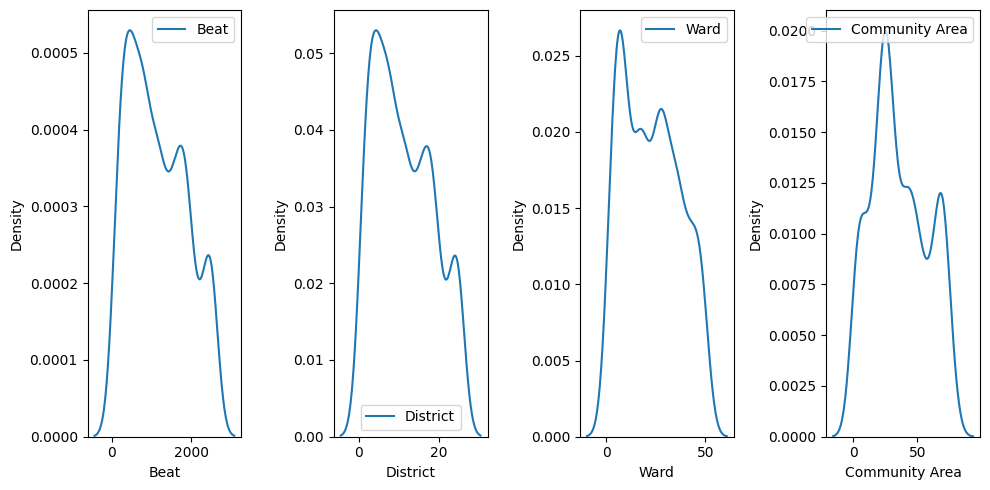

In [108]:
plt.figure(figsize=(10,5))
for i,col in enumerate(num_cols_1,1):
    plt.subplot(1,4,i)
    sns.kdeplot(df[col],label=col)
    plt.legend()
plt.tight_layout()
plt.show()

In [109]:
for col in num_cols_1:
    print(f"{col} : {(skew(df[col]))}")

Beat : 0.35649536946019966
District : 0.3583774040132764
Ward : 0.2202419367053774
Community Area : 0.2242397678011052


## Outliers ##

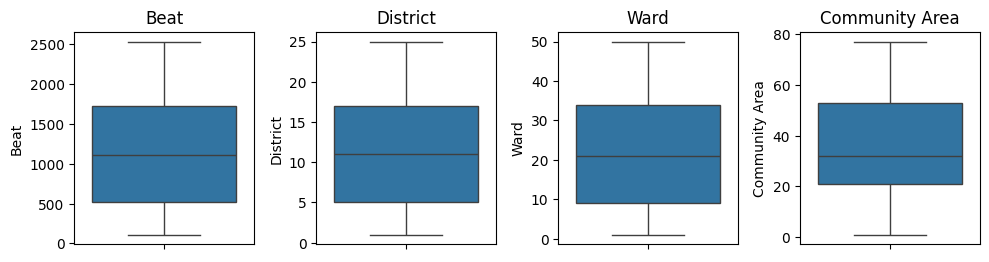

In [110]:
plt.figure(figsize=(10,5))
for i,col in enumerate(num_cols_1,1):
    plt.subplot(2,4,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [111]:
num_cols

ID  Beat  District  Ward  Community Area  X Coordinate  \
1       25953  2515        25 36.00           19.00    1141387.00   
2       26038  1711        17 50.00           13.00    1152781.00   
3    13279676  1922        19 47.00            5.00    1162518.00   
4    13274752   632         6  6.00           44.00    1183071.00   
6    13203321   122         1 42.00           32.00    1174694.00   
..        ...   ...       ...   ...             ...           ...   
994  13203421   131         1  3.00           33.00    1176976.00   
995  13202672   323         3  6.00           69.00    1182132.00   
996  13204410   732         7  6.00           68.00    1172423.00   
997  13204809   424         4 10.00           46.00    1198930.00   
998  13208800   332         3  5.00           43.00    1188026.00   

     Y Coordinate  Year  Latitude  Longitude  hour  year  
1      1913179.00  2021     41.92     -87.76    15  2021  
2      1941458.00  2021     42.00     -87.71     9  2021  
3      1925906.00  2023     41.95     -87.68     7  2023  
4      1847869.00  2023     41.74     -87.60     7  2023  
6      1901831.00  2023     41.89     -87.63    17  2023  
..            ...   ...       ...        ...   ...   ...  
994    1894313.00  2023     41.87     -87.63    20  2023  
995    1857805.00  2023     41.77     -87.61     0  2023  
996    1857127.00  2023     41.76     -87.64    13  2023  
997    1850326.00  2023     41.74     -87.55    20  2023  
998    1860655.00  2023     41.77     -87.59     2  2023  

[977 rows x 12 columns]

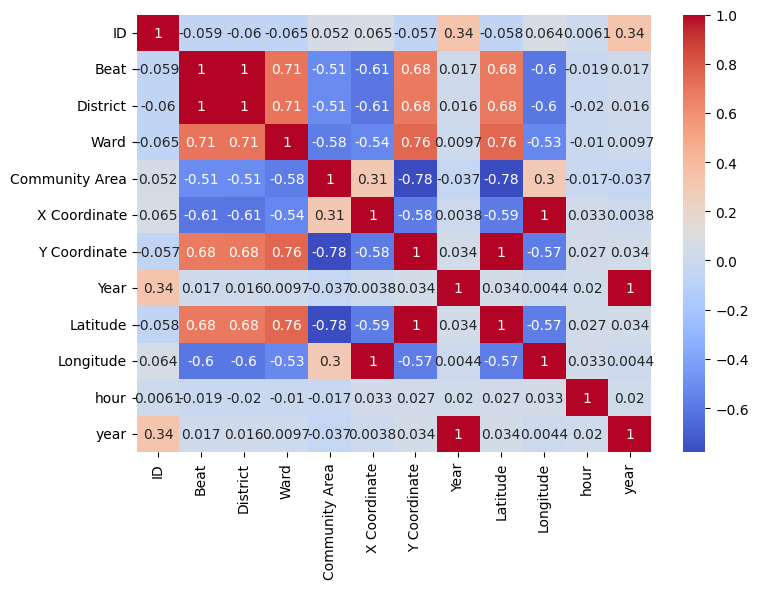

In [112]:
correlation = num_cols.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.tight_layout()
plt.show()

# Temporal Analysis #

## Crime trends over time ##

In [113]:
df['month_name'] = df['Date'].dt.month_name()

In [114]:
df['day'] = df['Date'].dt.day_name()

In [115]:
df['hour'] = df['Date'].dt.hour

In [116]:
df['year'] = df['Date'].dt.year

In [117]:
df[['year','month_name','day','hour']]

year month_name        day  hour
1    2021        May     Monday    15
2    2021       June   Saturday     9
3    2023   November   Thursday     7
4    2023   November     Sunday     7
6    2023  September  Wednesday    17
..    ...        ...        ...   ...
994  2023  September   Thursday    20
995  2023  September   Thursday     0
996  2023  September   Thursday    13
997  2023  September   Thursday    20
998  2023  September    Tuesday     2

[977 rows x 4 columns]

In [118]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'month_name', 'day', 'hour', 'year'],
      dtype='object')

In [119]:
crime_grp = df.groupby('Primary Type')

## Yearwise Crime Occurence ##

In [120]:
no_of_crime_year = crime_grp['Year'].value_counts().sort_values(ascending=False)
crime_yr_df = pd.DataFrame(no_of_crime_year).reset_index()
crime_yr_df

Primary Type  Year  count
0                               THEFT  2023    201
1                             BATTERY  2023    146
2                     CRIMINAL DAMAGE  2023    111
3                 MOTOR VEHICLE THEFT  2023    101
4                             ASSAULT  2023     94
5                  DECEPTIVE PRACTICE  2023     63
6                       OTHER OFFENSE  2023     51
7                            BURGLARY  2023     37
8                             ROBBERY  2023     33
9                   WEAPONS VIOLATION  2023     24
10                  CRIMINAL TRESPASS  2023     19
11                        SEX OFFENSE  2023     18
12         OFFENSE INVOLVING CHILDREN  2023     13
13                          NARCOTICS  2023     13
14            CRIMINAL SEXUAL ASSAULT  2023      6
15                           STALKING  2023      4
16                              ARSON  2023      4
17                            BATTERY  2022      4
18                            ROBBERY  2022      3
19                           HOMICIDE  2021      3
20                       PROSTITUTION  2023      3
21             PUBLIC PEACE VIOLATION  2023      3
22                        SEX OFFENSE  2022      3
23                           HOMICIDE  2023      2
24                      OTHER OFFENSE  2022      2
25                            ROBBERY  2019      2
26            CRIMINAL SEXUAL ASSAULT  2018      1
27                              THEFT  2022      1
28                              THEFT  2019      1
29                           BURGLARY  2022      1
30  CONCEALED CARRY LICENSE VIOLATION  2023      1
31                         KIDNAPPING  2023      1
32                            ROBBERY  2021      1
33                            ROBBERY  2010      1
34   INTERFERENCE WITH PUBLIC OFFICER  2023      1
35            CRIMINAL SEXUAL ASSAULT  2020      1
36            CRIMINAL SEXUAL ASSAULT  2022      1
37         OFFENSE INVOLVING CHILDREN  2022      1
38         OFFENSE INVOLVING CHILDREN  2019      1
39                  WEAPONS VIOLATION  2022      1

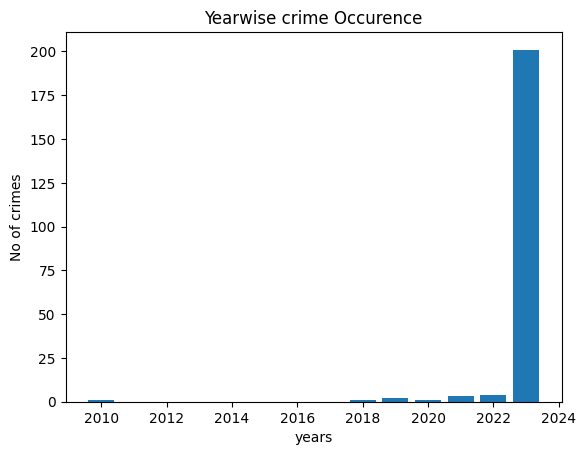

In [121]:
plt.bar(crime_yr_df['Year'],crime_yr_df['count'])
plt.xlabel("years")
plt.ylabel("No of crimes")
plt.title('Yearwise crime Occurence')
plt.show()

In [122]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'month_name', 'day', 'hour', 'year'],
      dtype='object')

In [123]:
def year_freq():
    no_of_crime_year = crime_grp['Year'].value_counts().sort_values(ascending=False)
    crime_yr_df = pd.DataFrame(no_of_crime_year).reset_index()
    return crime_yr_df

In [124]:
def year_plot():
    fig = plt.bar(crime_yr_df['Year'],crime_yr_df['count'])
    plt.xlabel("years")
    plt.ylabel("No of crimes")
    plt.title('Yearwise crime Occurence')
    plt.show()
    return fig

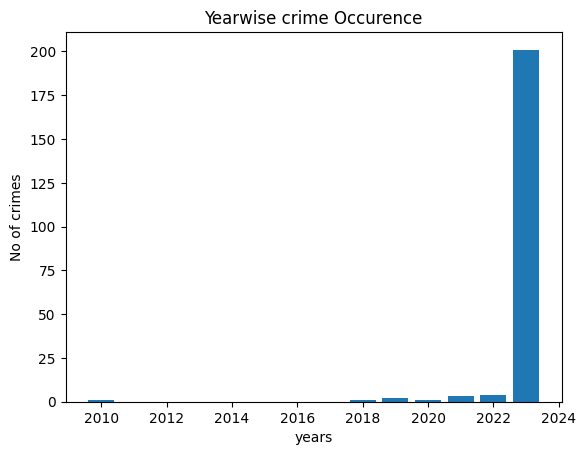

<BarContainer object of 40 artists>

In [125]:
year_plot()

## Monthwise Crime Occurence ##

In [126]:
no_of_crime_month = crime_grp['month_name'].value_counts().sort_values(ascending=False)
crime_month_df = pd.DataFrame(no_of_crime_month).reset_index()
crime_month_df

Primary Type month_name  count
0                        THEFT  September    160
1                      BATTERY  September    131
2              CRIMINAL DAMAGE  September     99
3                      ASSAULT  September     88
4          MOTOR VEHICLE THEFT  September     80
..                         ...        ...    ...
85         MOTOR VEHICLE THEFT        May      1
86  OFFENSE INVOLVING CHILDREN    January      1
87  OFFENSE INVOLVING CHILDREN       July      1
88  OFFENSE INVOLVING CHILDREN        May      1
89           WEAPONS VIOLATION   November      1

[90 rows x 3 columns]

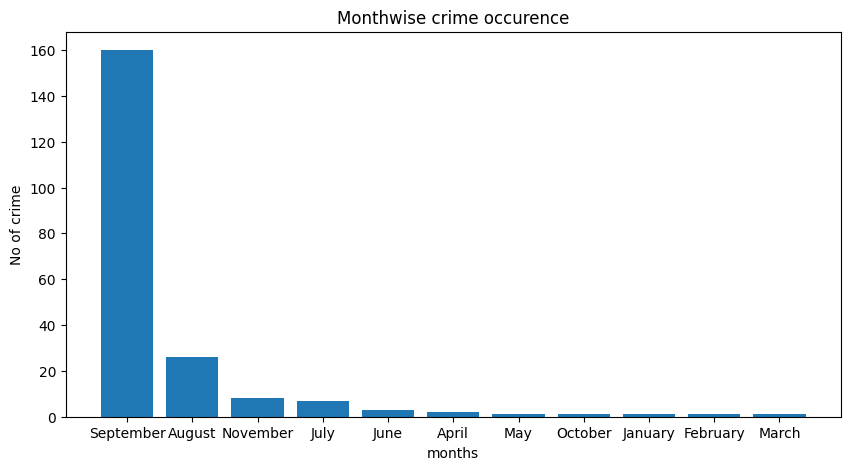

In [127]:
plt.figure(figsize=(10,5))
plt.bar(crime_month_df['month_name'],crime_month_df['count'])
plt.xlabel('months')
plt.ylabel('No of crime')
plt.title('Monthwise crime occurence')
plt.show()

In [128]:
def month_wise_crime():
    no_of_crime_month = crime_grp['month_name'].value_counts().sort_values(ascending=False)
    crime_month_df_month = pd.DataFrame(no_of_crime_month).reset_index()
    return crime_month_df_month


In [129]:
month_wise_crime()

Primary Type month_name  count
0                        THEFT  September    160
1                      BATTERY  September    131
2              CRIMINAL DAMAGE  September     99
3                      ASSAULT  September     88
4          MOTOR VEHICLE THEFT  September     80
..                         ...        ...    ...
85         MOTOR VEHICLE THEFT        May      1
86  OFFENSE INVOLVING CHILDREN    January      1
87  OFFENSE INVOLVING CHILDREN       July      1
88  OFFENSE INVOLVING CHILDREN        May      1
89           WEAPONS VIOLATION   November      1

[90 rows x 3 columns]

In [130]:
def monthly_plot():
    month_fig = plt.figure(figsize=(10,5))
    plt.bar(month_wise_crime()['month_name'],month_wise_crime()['count'])
    plt.xlabel('months')
    plt.ylabel('No of crime')
    plt.title('Monthwise crime occurence')
    plt.show()
    
    

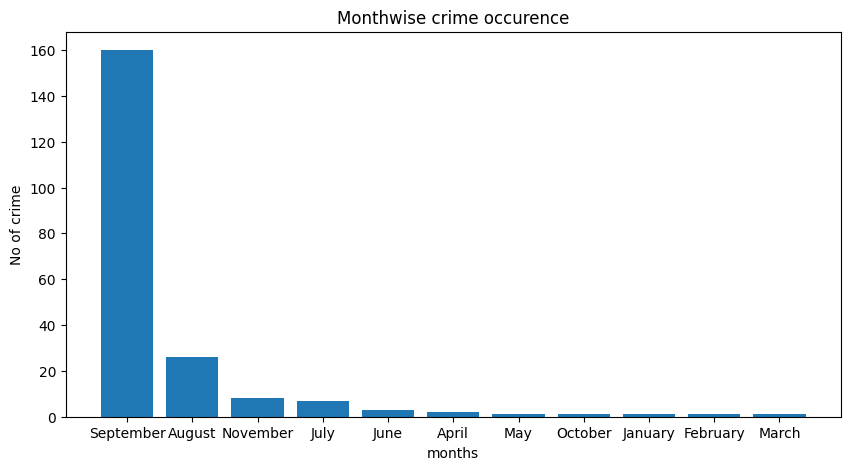

In [131]:
monthly_plot()

## Daywise Crime Occurence ##

In [132]:
no_of_crime_day = crime_grp[['Year','month_name','day']].value_counts().sort_values(ascending=False)
crime_day_df = pd.DataFrame(no_of_crime_day).reset_index()
crime_day_df

Primary Type  Year month_name        day  count
0                      THEFT  2023  September  Wednesday    133
1                    BATTERY  2023  September  Wednesday    106
2            CRIMINAL DAMAGE  2023  September  Wednesday     83
3                    ASSAULT  2023  September  Wednesday     75
4        MOTOR VEHICLE THEFT  2023  September  Wednesday     69
..                       ...   ...        ...        ...    ...
178        CRIMINAL TRESPASS  2023     August   Saturday      1
179        CRIMINAL TRESPASS  2023     August     Monday      1
180  CRIMINAL SEXUAL ASSAULT  2023       July     Monday      1
181  CRIMINAL SEXUAL ASSAULT  2023     August     Friday      1
182        WEAPONS VIOLATION  2023     August     Friday      1

[183 rows x 5 columns]

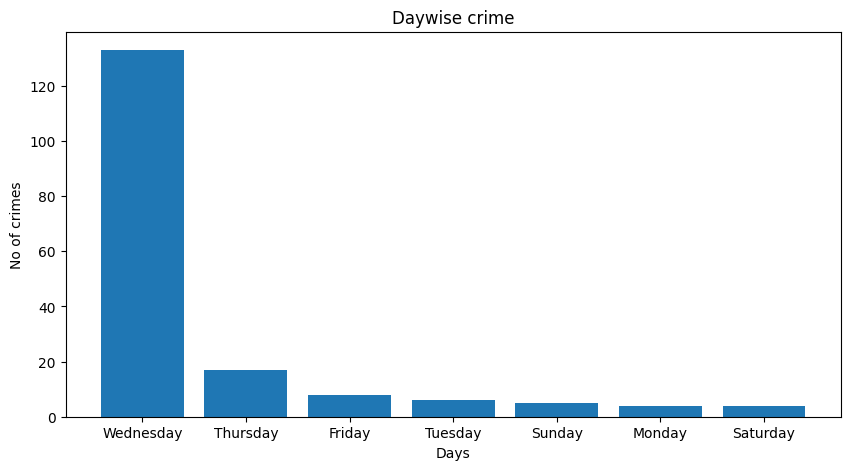

In [133]:
plt.figure(figsize=(10,5))
plt.bar(crime_day_df['day'],crime_day_df['count'])
plt.xlabel('Days')
plt.ylabel('No of crimes')
plt.title('Daywise crime')
plt.show()

In [134]:
def day_wise_crime():
    no_of_crime_day = crime_grp[['Year','month_name','day']].value_counts().sort_values(ascending=False)
    crime_day_df = pd.DataFrame(no_of_crime_day).reset_index()
    return crime_day_df

In [135]:
day_wise_crime()

Primary Type  Year month_name        day  count
0                      THEFT  2023  September  Wednesday    133
1                    BATTERY  2023  September  Wednesday    106
2            CRIMINAL DAMAGE  2023  September  Wednesday     83
3                    ASSAULT  2023  September  Wednesday     75
4        MOTOR VEHICLE THEFT  2023  September  Wednesday     69
..                       ...   ...        ...        ...    ...
178        CRIMINAL TRESPASS  2023     August   Saturday      1
179        CRIMINAL TRESPASS  2023     August     Monday      1
180  CRIMINAL SEXUAL ASSAULT  2023       July     Monday      1
181  CRIMINAL SEXUAL ASSAULT  2023     August     Friday      1
182        WEAPONS VIOLATION  2023     August     Friday      1

[183 rows x 5 columns]

In [136]:
def day_plot(df):
    fig = plt.figure(figsize=(10,5))
    plt.bar(crime_day_df['day'],crime_day_df['count'])
    plt.xlabel('Days')
    plt.ylabel('No of crimes')
    plt.title('Daywise crime')
    plt.show()
    

In [137]:
def day_plot():
    fig = plt.figure(figsize=(10,5))
    plt.bar(day_wise_crime()['day'],day_wise_crime()['count'])
    plt.xlabel('Days')
    plt.ylabel('No of crimes')
    plt.title('Daywise crime')
    plt.show()

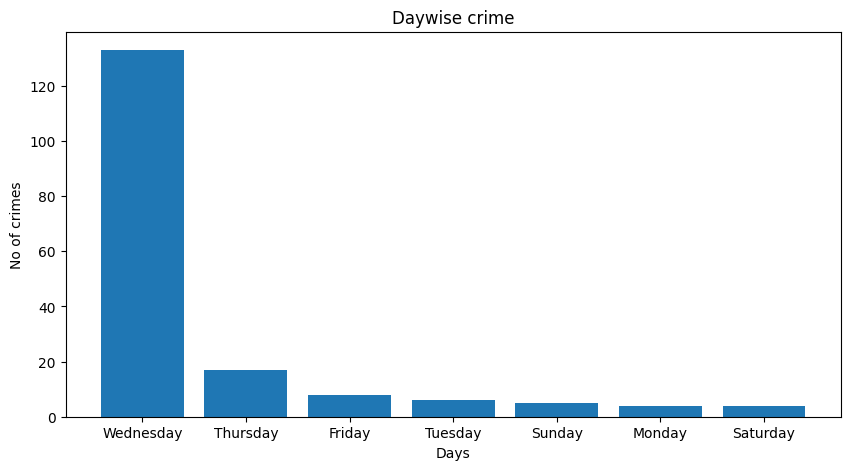

In [138]:
day_plot()

## Hourwise Crime Occurence ##

In [139]:
no_of_crime_hour =  crime_grp[['Date','hour']].value_counts().sort_values(ascending=False)
crime_hour_df = pd.DataFrame(no_of_crime_hour).reset_index()
crime_hour_df

Primary Type                Date  hour  count
0        CRIMINAL DAMAGE 2023-09-06 18:00:00    18     10
1    MOTOR VEHICLE THEFT 2023-09-06 19:00:00    19      7
2    MOTOR VEHICLE THEFT 2023-09-06 22:00:00    22      5
3                  THEFT 2023-09-06 02:00:00     2      5
4                  THEFT 2023-09-06 18:00:00    18      5
..                   ...                 ...   ...    ...
844      CRIMINAL DAMAGE 2023-09-06 12:30:00    12      1
845      CRIMINAL DAMAGE 2023-09-06 12:36:00    12      1
846      CRIMINAL DAMAGE 2023-09-06 13:10:00    13      1
847      CRIMINAL DAMAGE 2023-09-06 14:00:00    14      1
848    WEAPONS VIOLATION 2023-09-07 17:40:00    17      1

[849 rows x 4 columns]

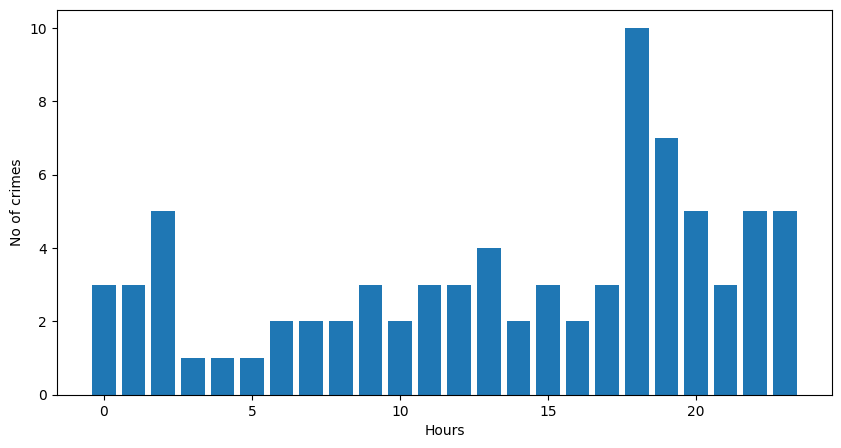

In [140]:
plt.figure(figsize=(10,5))
plt.bar(crime_hour_df['hour'],crime_hour_df['count'])
plt.xlabel('Hours')
plt.ylabel('No of crimes')
plt.show()

In [141]:
def hour_crime():
    no_of_crime_hour =  crime_grp[['Date','hour']].value_counts().sort_values(ascending=False)
    crime_hour_df = pd.DataFrame(no_of_crime_hour).reset_index()
    return crime_hour_df

In [142]:
hour_crime()

Primary Type                Date  hour  count
0        CRIMINAL DAMAGE 2023-09-06 18:00:00    18     10
1    MOTOR VEHICLE THEFT 2023-09-06 19:00:00    19      7
2    MOTOR VEHICLE THEFT 2023-09-06 22:00:00    22      5
3                  THEFT 2023-09-06 02:00:00     2      5
4                  THEFT 2023-09-06 18:00:00    18      5
..                   ...                 ...   ...    ...
844      CRIMINAL DAMAGE 2023-09-06 12:30:00    12      1
845      CRIMINAL DAMAGE 2023-09-06 12:36:00    12      1
846      CRIMINAL DAMAGE 2023-09-06 13:10:00    13      1
847      CRIMINAL DAMAGE 2023-09-06 14:00:00    14      1
848    WEAPONS VIOLATION 2023-09-07 17:40:00    17      1

[849 rows x 4 columns]

In [143]:
def hourly_crime_plot():
    fig = plt.figure(figsize=(10,5))
    plt.bar(hour_crime()['hour'],hour_crime()['count'])
    plt.xlabel('Hours')
    plt.ylabel('No of crimes')
    plt.show()

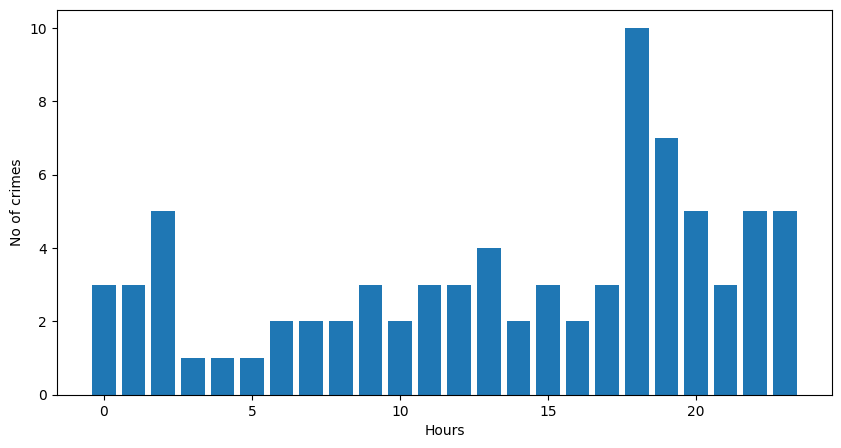

In [144]:
hourly_crime_plot()

## Location-specific Analysis ##

### Areas where more crimes are happening? ###

In [145]:
data = df[['Primary Type','Location Description']].value_counts()
crime_area_df = pd.DataFrame(data).reset_index()
crime_area_df


Primary Type  Location Description  count
0    MOTOR VEHICLE THEFT                STREET     70
1                  THEFT                STREET     60
2        CRIMINAL DAMAGE                STREET     54
3                BATTERY             APARTMENT     43
4                ASSAULT             APARTMENT     28
..                   ...                   ...    ...
241   DECEPTIVE PRACTICE              SIDEWALK      1
242                ARSON             APARTMENT      1
243   DECEPTIVE PRACTICE  VEHICLE - COMMERCIAL      1
244             HOMICIDE                 ALLEY      1
245                ARSON                 ALLEY      1

[246 rows x 3 columns]

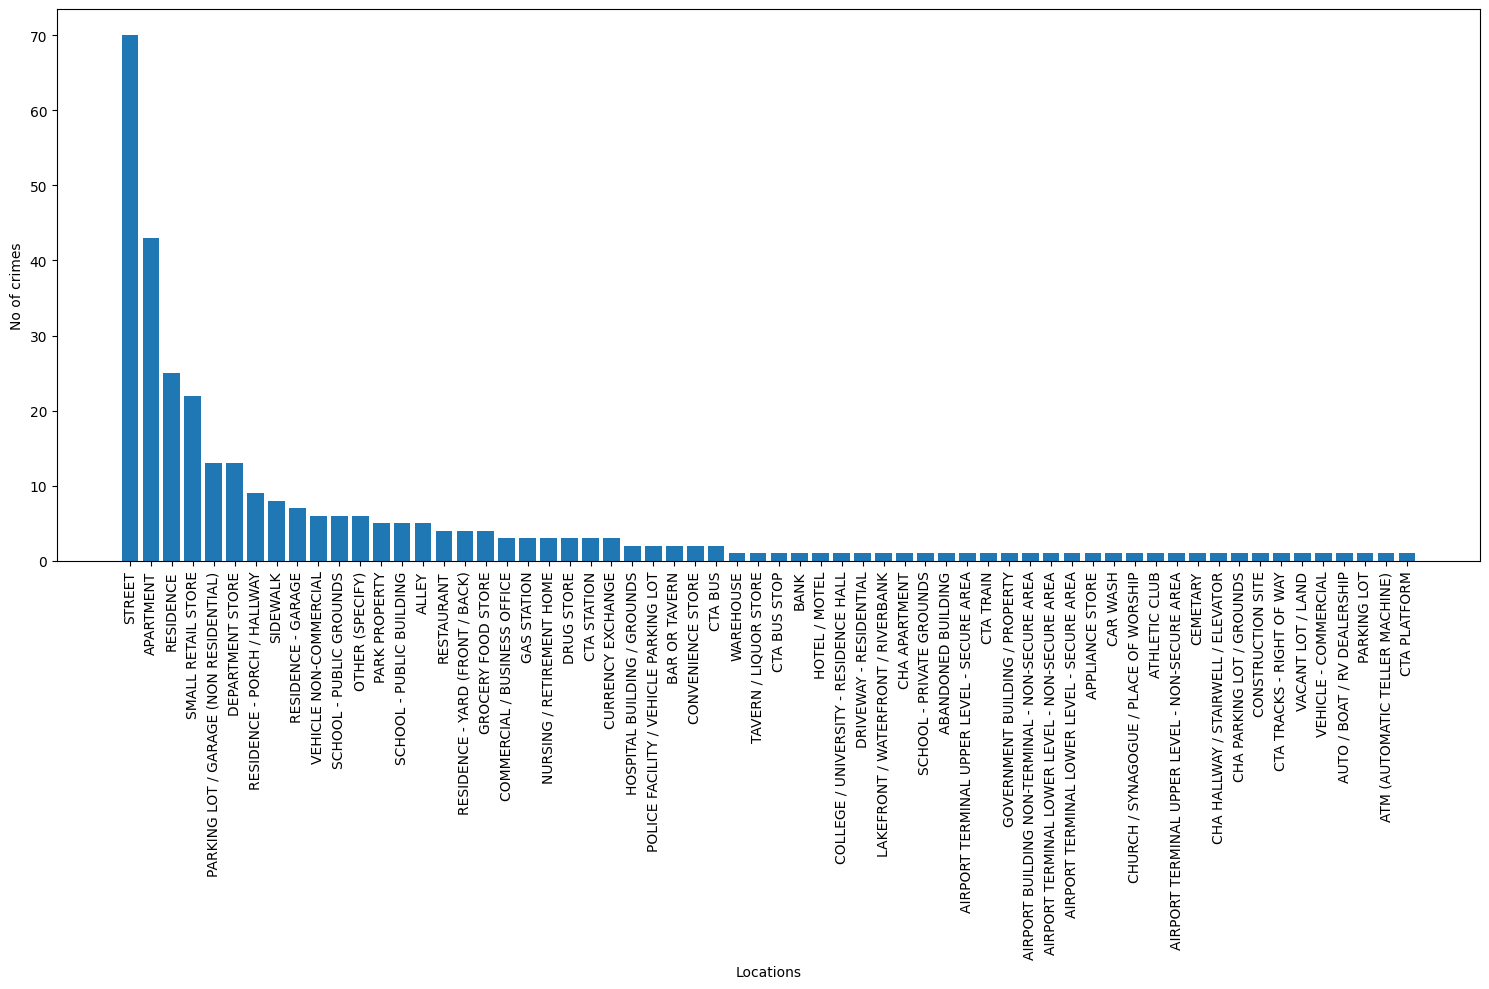

In [146]:
plt.figure(figsize=(15,10))
plt.bar(crime_area_df['Location Description'],crime_area_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Locations')
plt.ylabel('No of crimes')
plt.tight_layout()
plt.show()

In [147]:
def crime_rich_area():
    data = df[['Primary Type','Location Description']].value_counts()
    crime_area_df = pd.DataFrame(data).reset_index()
    return crime_area_df


In [148]:
crime_rich_area()

Primary Type  Location Description  count
0    MOTOR VEHICLE THEFT                STREET     70
1                  THEFT                STREET     60
2        CRIMINAL DAMAGE                STREET     54
3                BATTERY             APARTMENT     43
4                ASSAULT             APARTMENT     28
..                   ...                   ...    ...
241   DECEPTIVE PRACTICE              SIDEWALK      1
242                ARSON             APARTMENT      1
243   DECEPTIVE PRACTICE  VEHICLE - COMMERCIAL      1
244             HOMICIDE                 ALLEY      1
245                ARSON                 ALLEY      1

[246 rows x 3 columns]

In [149]:
def crime_rich_area_plot():
    fig = plt.figure(figsize=(15,10))
    plt.bar(crime_rich_area()['Location Description'],crime_rich_area()['count'])
    plt.xticks(rotation=90)
    plt.xlabel('Locations')
    plt.ylabel('No of crimes')
    plt.tight_layout()
    plt.show()

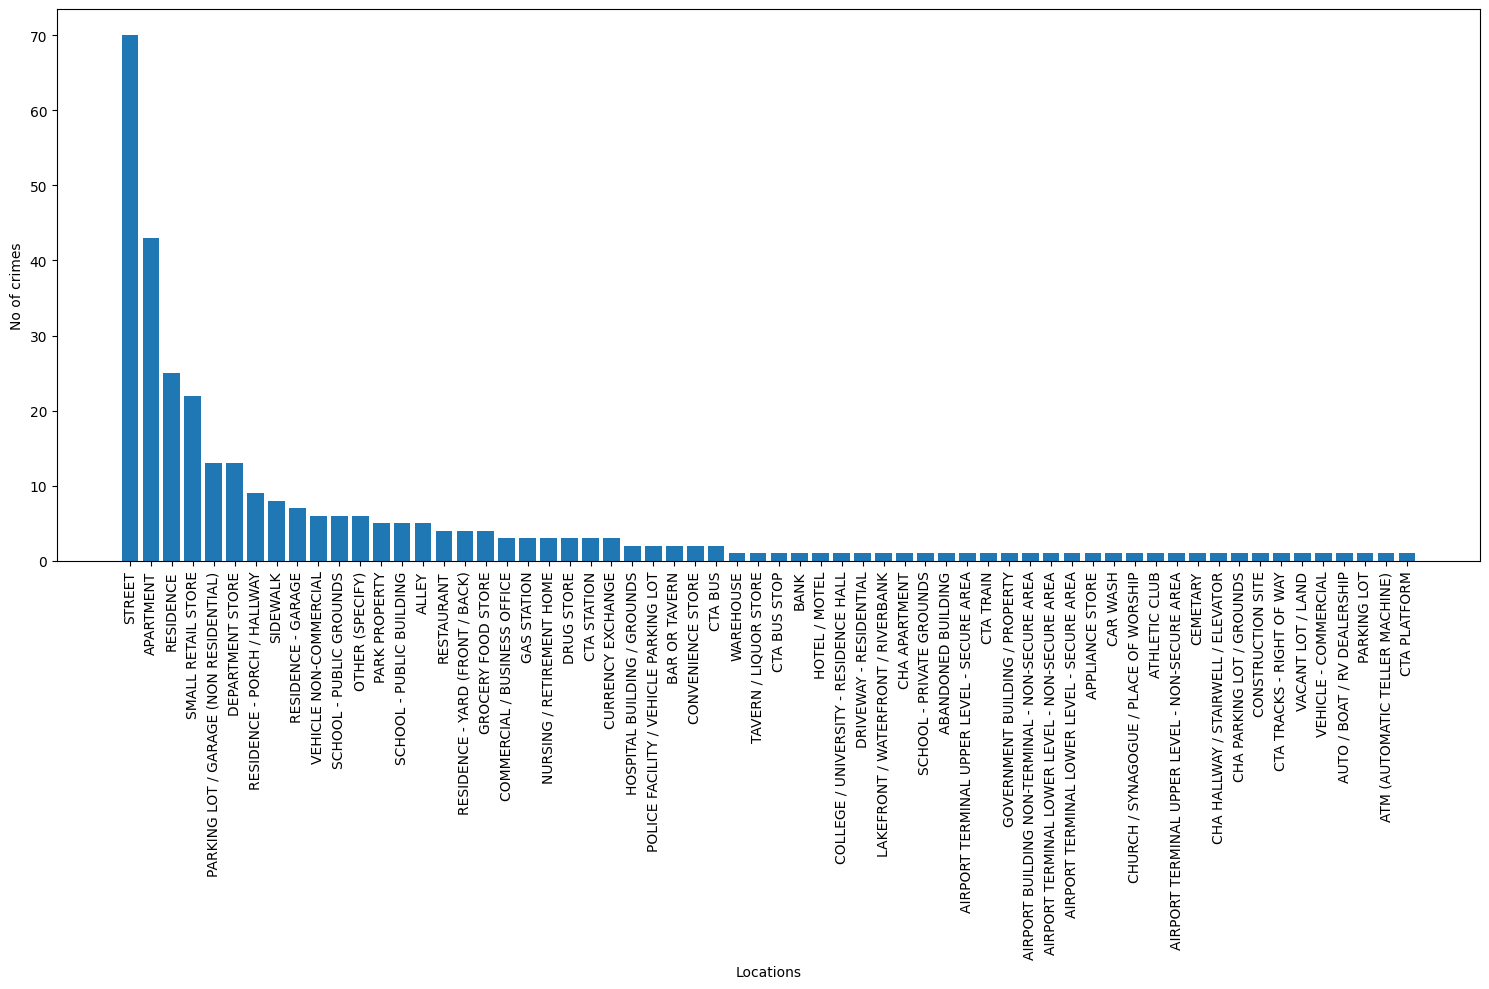

In [150]:
crime_rich_area_plot()

## Crime pattern Analysis ##

In [151]:
data_9 = crime_grp['Community Area'].value_counts().sort_values(ascending=False)
com_area_df = pd.DataFrame(data_9).reset_index()
com_area_df

Primary Type  Community Area  count
0                 THEFT           24.00     14
1       CRIMINAL DAMAGE           39.00     13
2                 THEFT           28.00     13
3                 THEFT           22.00     11
4                 THEFT           32.00     10
..                  ...             ...    ...
474  DECEPTIVE PRACTICE           23.00      1
475  DECEPTIVE PRACTICE           22.00      1
476  DECEPTIVE PRACTICE           17.00      1
477  DECEPTIVE PRACTICE            6.00      1
478   WEAPONS VIOLATION           75.00      1

[479 rows x 3 columns]

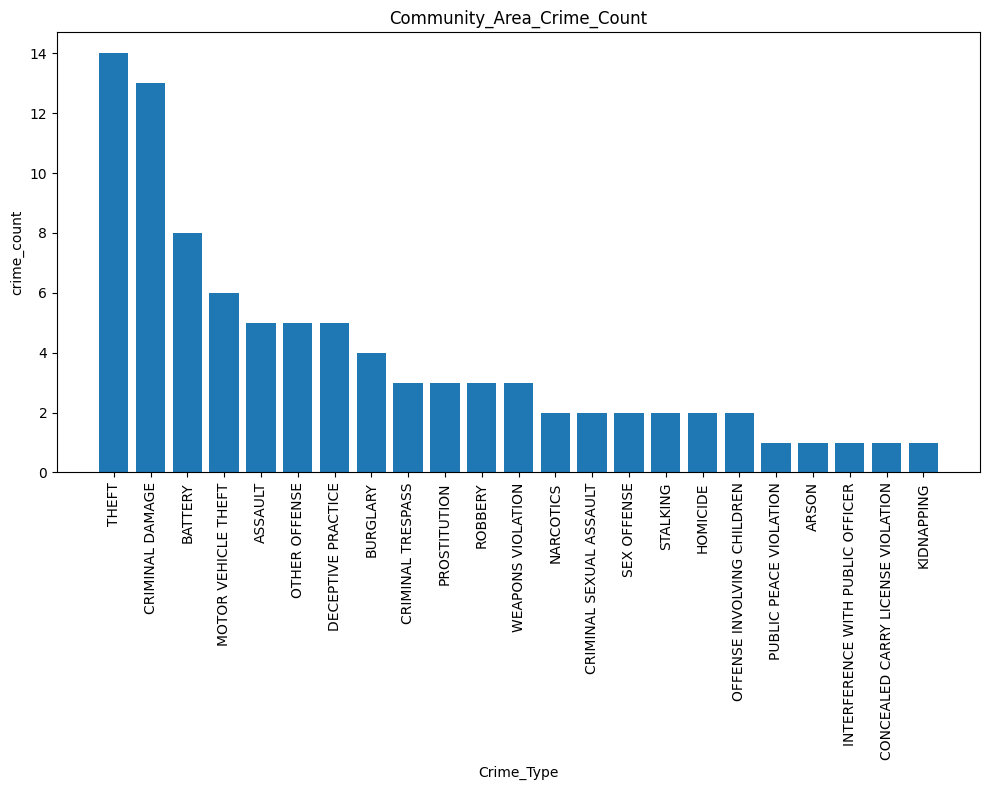

In [152]:
plt.figure(figsize=(10,8))
plt.bar(com_area_df['Primary Type'],com_area_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('crime_count')
plt.title('Community_Area_Crime_Count')
plt.tight_layout()
plt.show()

In [153]:
def community_area():
    data_9 = crime_grp['Community Area'].value_counts().sort_values(ascending=False)
    com_area_df = pd.DataFrame(data_9).reset_index()
    return com_area_df

In [154]:
community_area()

Primary Type  Community Area  count
0                 THEFT           24.00     14
1       CRIMINAL DAMAGE           39.00     13
2                 THEFT           28.00     13
3                 THEFT           22.00     11
4                 THEFT           32.00     10
..                  ...             ...    ...
474  DECEPTIVE PRACTICE           23.00      1
475  DECEPTIVE PRACTICE           22.00      1
476  DECEPTIVE PRACTICE           17.00      1
477  DECEPTIVE PRACTICE            6.00      1
478   WEAPONS VIOLATION           75.00      1

[479 rows x 3 columns]

In [155]:
def community_area_plot():
    fig = plt.figure(figsize=(10,8))
    plt.bar(community_area()['Primary Type'],community_area()['count'])
    plt.xticks(rotation=90)
    plt.xlabel('Crime_Type')
    plt.ylabel('crime_count')
    plt.title('Community_Area_Crime_Count')
    plt.tight_layout()
    plt.show()

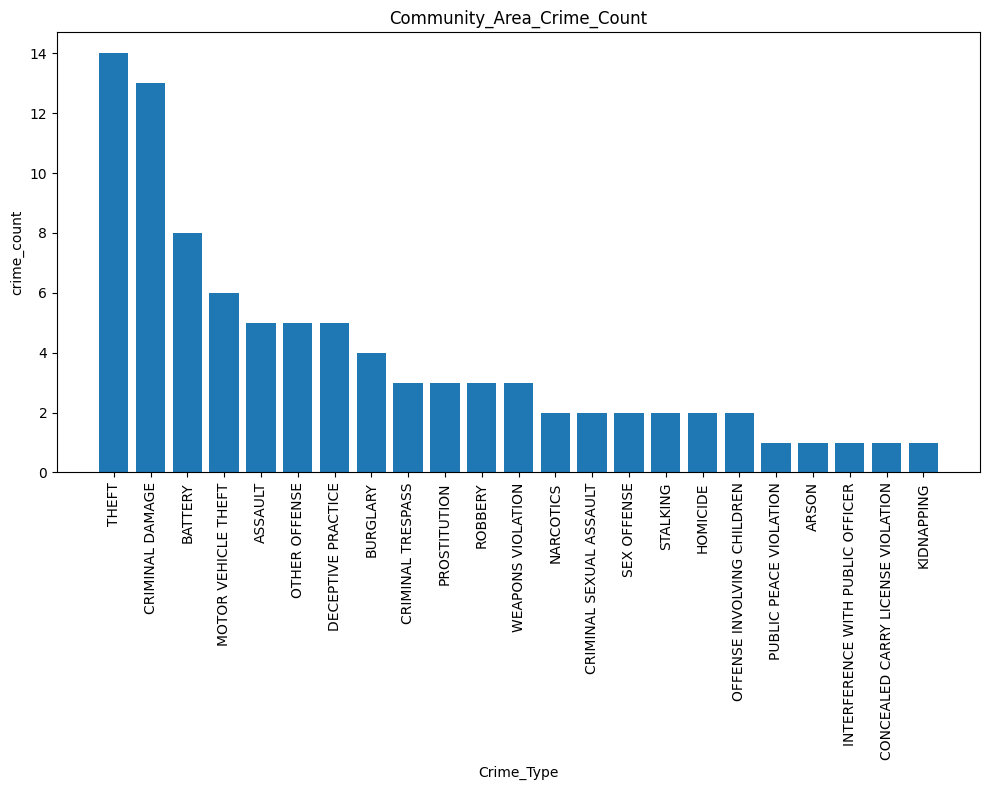

In [156]:
community_area_plot()

In [157]:
data_10 = crime_grp['Beat'].value_counts().sort_values(ascending=False)
beat_df = pd.DataFrame(data_10).reset_index()
beat_df

Primary Type  Beat  count
0      CRIMINAL DAMAGE   222     13
1                THEFT   222      5
2                THEFT  1424      5
3                THEFT  1934      4
4      CRIMINAL DAMAGE  1915      4
..                 ...   ...    ...
744    CRIMINAL DAMAGE  1922      1
745    CRIMINAL DAMAGE  1925      1
746    CRIMINAL DAMAGE  2022      1
747    CRIMINAL DAMAGE  2031      1
748  WEAPONS VIOLATION  2525      1

[749 rows x 3 columns]

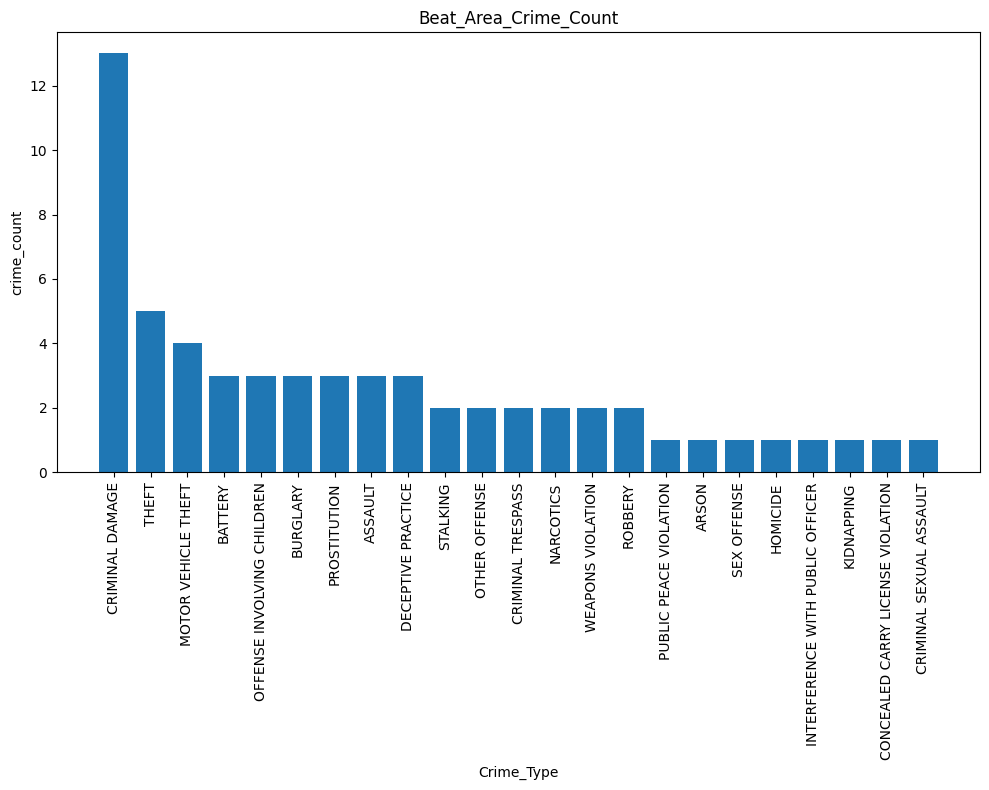

In [158]:
plt.figure(figsize=(10,8))
plt.bar(beat_df['Primary Type'],beat_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('crime_count')
plt.title('Beat_Area_Crime_Count')
plt.tight_layout()
plt.show()

In [159]:
def beat_area_crime():
    data_10 = crime_grp['Beat'].value_counts().sort_values(ascending=False)
    beat_df = pd.DataFrame(data_10).reset_index()
    return beat_df 

In [385]:
beat_area_crime().value_counts().sum()

749

In [161]:
def beat_area_crime_plot():
    fig = plt.figure(figsize=(10,8))
    plt.bar(beat_area_crime()['Primary Type'],beat_area_crime()['count'])
    plt.xticks(rotation=90)
    plt.xlabel('Crime_Type')
    plt.ylabel('crime_count')
    plt.title('Beat_Area_Crime_Count')
    plt.tight_layout()
    plt.show()

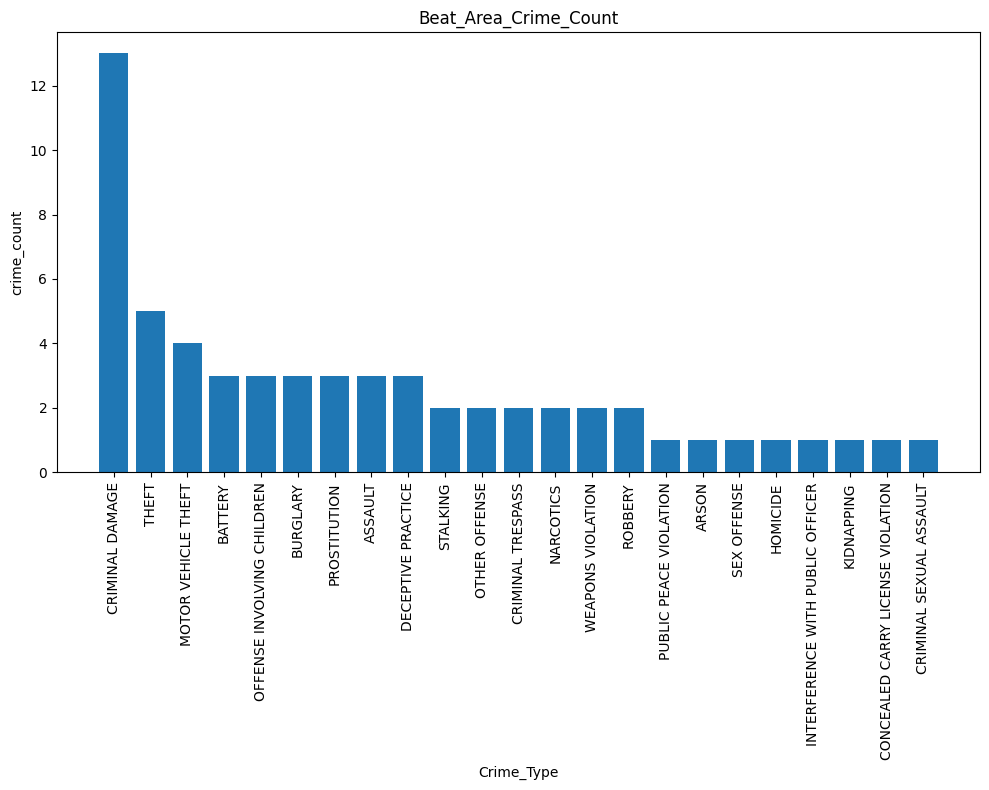

In [162]:
beat_area_crime_plot()

## Community_area_crime vs Beat_crime ##

In [163]:
com_and_beat = pd.concat([com_area_df,beat_df],axis=1,join='inner')
com_and_beat

Primary Type  Community Area  count     Primary Type  Beat  count
0                 THEFT           24.00     14  CRIMINAL DAMAGE   222     13
1       CRIMINAL DAMAGE           39.00     13            THEFT   222      5
2                 THEFT           28.00     13            THEFT  1424      5
3                 THEFT           22.00     11            THEFT  1934      4
4                 THEFT           32.00     10  CRIMINAL DAMAGE  1915      4
..                  ...             ...    ...              ...   ...    ...
474  DECEPTIVE PRACTICE           23.00      1         BURGLARY   215      1
475  DECEPTIVE PRACTICE           22.00      1         BURGLARY   224      1
476  DECEPTIVE PRACTICE           17.00      1         BURGLARY   225      1
477  DECEPTIVE PRACTICE            6.00      1         BURGLARY   231      1
478   WEAPONS VIOLATION           75.00      1         BURGLARY   432      1

[479 rows x 6 columns]

In [373]:
def com_and_beat():
    com_and_beat = pd.concat([community_area(),beat_area_crime()],axis=1,join='inner')
    return com_and_beat

In [374]:
com_and_beat()

Primary Type  Community Area  count     Primary Type  Beat  count
0                 THEFT           24.00     14  CRIMINAL DAMAGE   222     13
1       CRIMINAL DAMAGE           39.00     13            THEFT   222      5
2                 THEFT           28.00     13            THEFT  1424      5
3                 THEFT           22.00     11            THEFT  1934      4
4                 THEFT           32.00     10  CRIMINAL DAMAGE  1915      4
..                  ...             ...    ...              ...   ...    ...
474  DECEPTIVE PRACTICE           23.00      1         BURGLARY   215      1
475  DECEPTIVE PRACTICE           22.00      1         BURGLARY   224      1
476  DECEPTIVE PRACTICE           17.00      1         BURGLARY   225      1
477  DECEPTIVE PRACTICE            6.00      1         BURGLARY   231      1
478   WEAPONS VIOLATION           75.00      1         BURGLARY   432      1

[479 rows x 6 columns]

In [166]:
crime_type =  np.arange(23)


In [167]:
len(beat_df['Beat'].tolist())

749

In [168]:
len(com_area_df['Community Area'].tolist())

479

In [169]:
new_diction = {'comm_crime' : com_area_df['Community Area'].tolist(),'beat_crime': beat_df['Beat'].tolist()}

In [170]:
new_diction.keys()

dict_keys(['comm_crime', 'beat_crime'])

In [171]:
def com_crime_vs_beat_crime():
    com_area_df = community_area()
    beat_df = beat_area_crime()    
    new_diction = {'comm_crime' : com_area_df['Community Area'].tolist(),'beat_crime': beat_df['Beat'].tolist()}
    max_points = 100                                                       
    fig,ax = plt.subplots(layout='constrained')
    for k,v in new_diction.items():
        if len(v) > max_points:
            v = v[:max_points]
        crime_type = np.arange(len(v))
        ax.bar(crime_type,v,label=k)
        
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('crime_count')
    ax.legend()
    plt.xticks(rotation=90)
    return fig
    


    

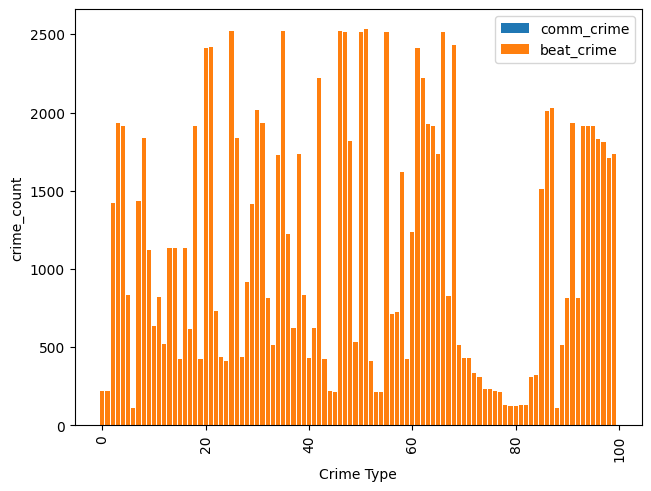

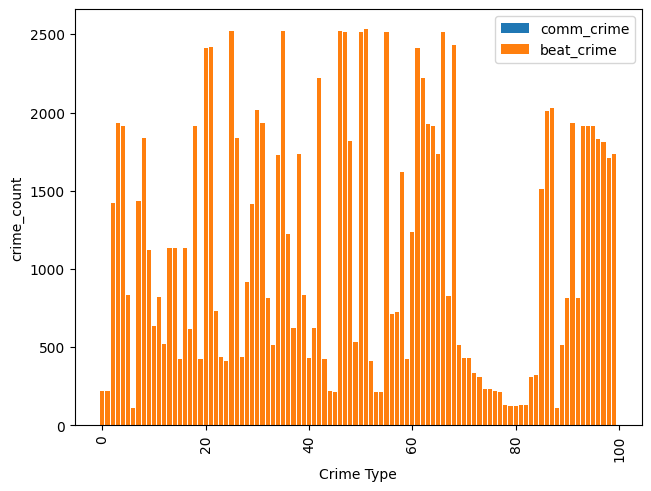

In [172]:
com_crime_vs_beat_crime()

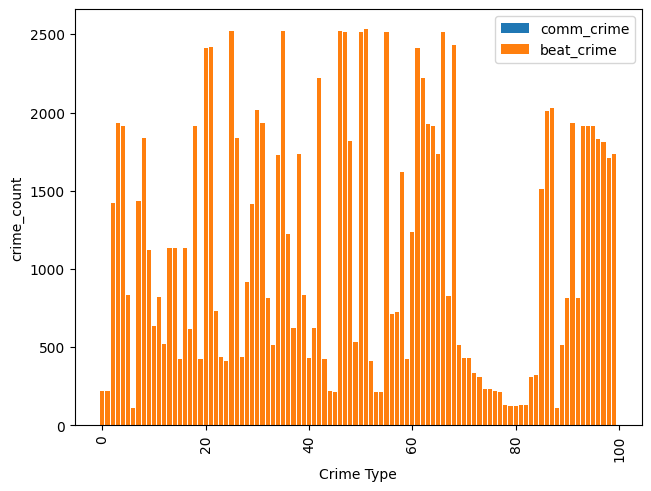

In [173]:
max_points = 100
                                                       
fig,ax = plt.subplots(layout='constrained')

for k,v in new_diction.items():
    if len(v) > max_points:
        v = v[:max_points]
    crime_type = np.arange(len(v))
    ax.bar(crime_type,v,label=k)
    
ax.set_xlabel('Crime Type')
ax.set_ylabel('crime_count')
ax.legend()
plt.xticks(rotation=90)
plt.show()
    



In [375]:
com_and_beat()

Primary Type  Community Area  count     Primary Type  Beat  count
0                 THEFT           24.00     14  CRIMINAL DAMAGE   222     13
1       CRIMINAL DAMAGE           39.00     13            THEFT   222      5
2                 THEFT           28.00     13            THEFT  1424      5
3                 THEFT           22.00     11            THEFT  1934      4
4                 THEFT           32.00     10  CRIMINAL DAMAGE  1915      4
..                  ...             ...    ...              ...   ...    ...
474  DECEPTIVE PRACTICE           23.00      1         BURGLARY   215      1
475  DECEPTIVE PRACTICE           22.00      1         BURGLARY   224      1
476  DECEPTIVE PRACTICE           17.00      1         BURGLARY   225      1
477  DECEPTIVE PRACTICE            6.00      1         BURGLARY   231      1
478   WEAPONS VIOLATION           75.00      1         BURGLARY   432      1

[479 rows x 6 columns]

In [378]:
crime_data_1= com_and_beat()
values_2 = [crime_data_1['Beat'].count().sum()]
values_2

[479]

In [ ]:
crime_data_1= com_and_beat()
values_1 = [crime_data_1['Community Area'].value_counts().sum()]
values_1

In [403]:
community_area().value_counts().sum()

479

In [401]:
beat_area_crime().value_counts().sum()

749

In [394]:
community_area().columns[1]

'Community Area'

In [397]:
beat_area_crime().columns[1]

'Beat'

In [398]:
values = [community_area().value_counts().sum(),beat_area_crime().value_counts().sum()]
category = [community_area().columns[1],beat_area_crime().columns[1]]
category

['Community Area', 'Beat']

In [416]:
def com_and_beat_df():
    data_14 = {'COMMUNITY AREA CRIME COUNT':479,'BEAT AREA CRIME COUNT':749}
    com_vs_beat_df = pd.DataFrame(data_14,index=['A'])
    return com_vs_beat_df

In [417]:
com_and_beat_df()

COMMUNITY AREA CRIME COUNT  BEAT AREA CRIME COUNT
A                         479                    749

In [409]:
def com_vs_beat():
    fig,ax = plt.subplots(figsize=(12,7))
    values = [community_area().value_counts().sum(),beat_area_crime().value_counts().sum()]
    category = [community_area().columns[1],beat_area_crime().columns[1]]
    color = ['red','orange']
    #explod = [0.1,0.2]
    ax.pie(values,labels=category,colors = color,autopct="%1.1f%%")
    ax.set_title("Community_area vs Beat crime")
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    return fig


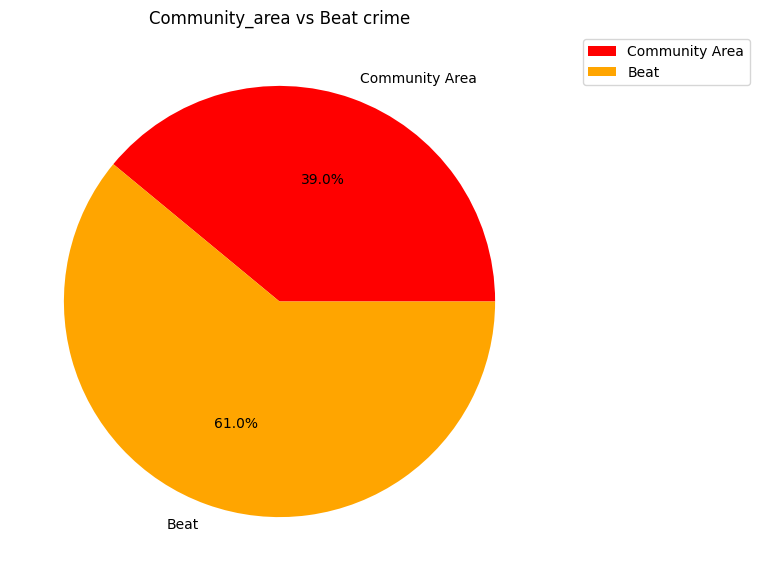

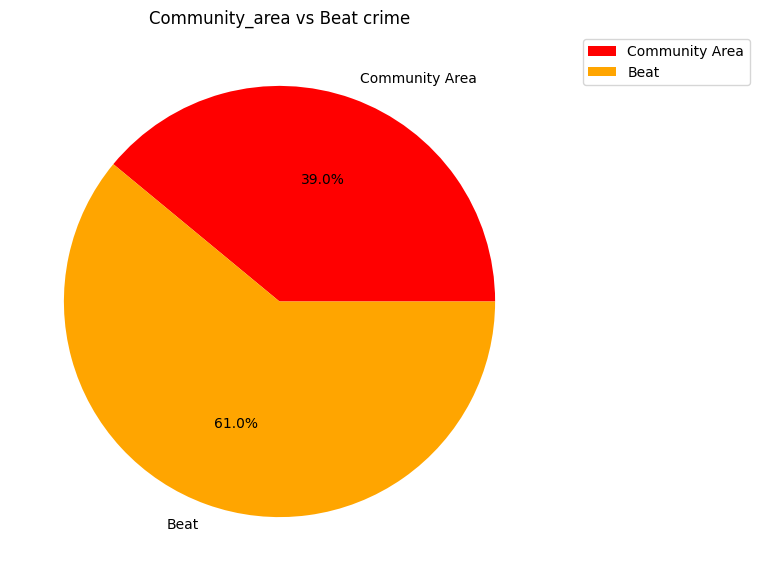

In [410]:
com_vs_beat()

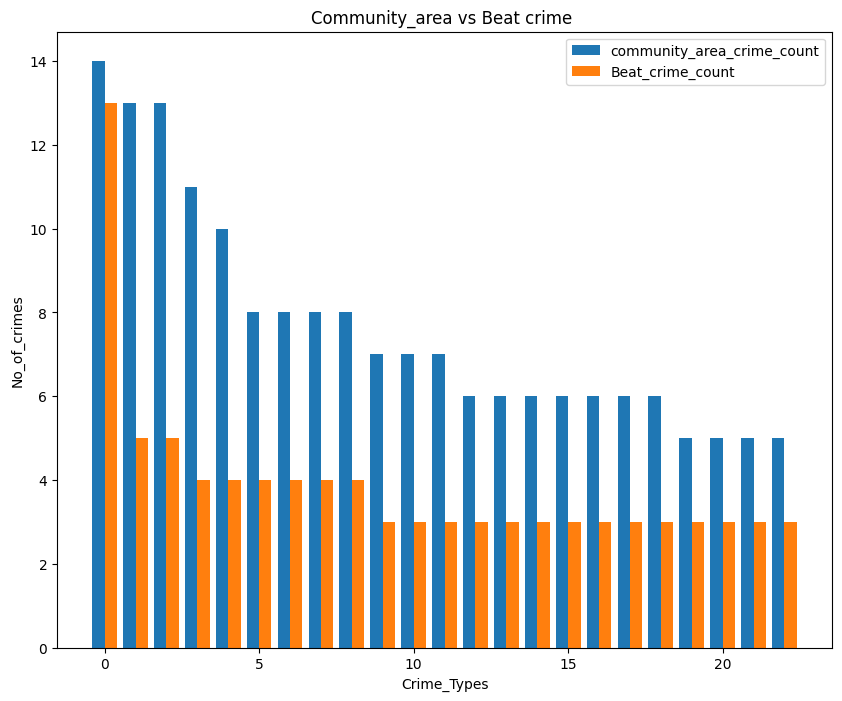

In [174]:
crime_type =  np.arange(23)                                                          
com_count = com_area_df['count'][:23].to_list()                         
beat_count = beat_df['count'][:23].to_list()
plt.figure(figsize=(10,8))
plt.bar(crime_type-0.2,com_count,width=0.4,label='community_area_crime_count')
plt.bar(crime_type+0.2,beat_count,width=0.4,label='Beat_crime_count')
plt.xlabel("Crime_Types")
plt.ylabel("No_of_crimes")
plt.title("Community_area vs Beat crime")
plt.legend()
plt.show()

In [175]:
def  com_and_beat():
    crime_type =  np.arange(23)                                                          
    com_count = community_area()['count'][:23].to_list()                         
    beat_count = beat_area_crime()['count'][:23].to_list()
    plt.figure(figsize=(10,8))
    plt.bar(crime_type-0.2,com_count,width=0.4,label='community_area_crime_count')
    plt.bar(crime_type+0.2,beat_count,width=0.4,label='Beat_crime_count')
    plt.xlabel("Crime_Types")
    plt.ylabel("No_of_crimes")
    plt.title("Community_area vs Beat crime ")
    plt.legend()
    plt.show()

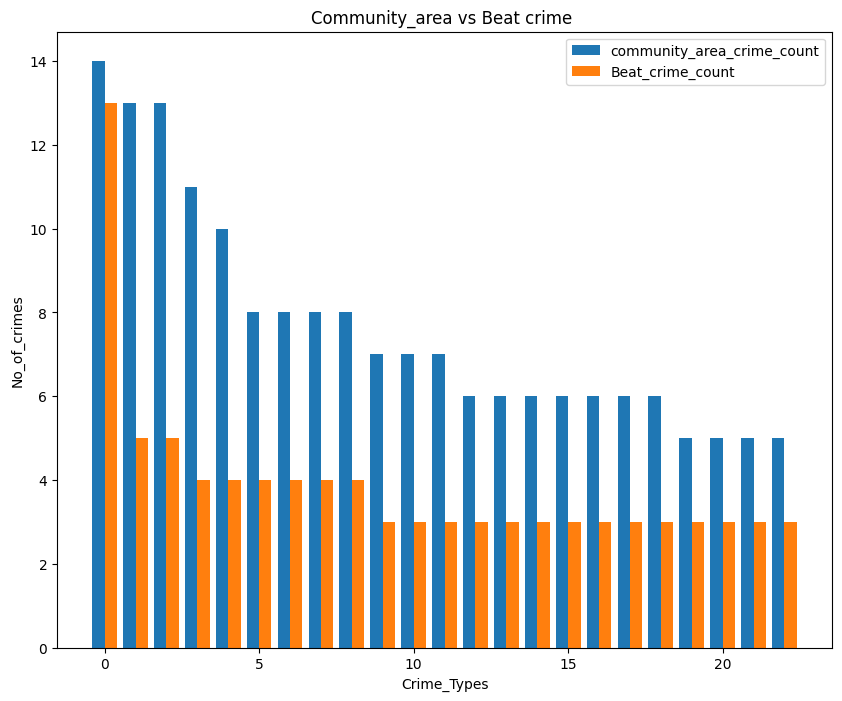

In [176]:
com_and_beat()

## Geospatial Analysis ##

In [177]:
df = df.dropna(subset=['Latitude', 'Longitude'])

## Heat Map to show the density of the crime incidents -View -I ##

In [178]:
map_center = [41.8337734,-88.0616153]
crime_map = folium.Map(location=map_center, zoom_start=8)

heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

HeatMap(heat_data).add_to(crime_map)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(f'crime_type:{row['Primary Type']} location :{row['Location Description']}')
    ).add_to(crime_map)

crime_map

In [179]:
def crime_density():
    map_center = [41.8337734,-88.0616153]
    crime_map = folium.Map(location=map_center, zoom_start=8)

    heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

    HeatMap(heat_data).add_to(crime_map)

    for index, row in df.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=(f'crime_type:{row['Primary Type']} location :{row['Location Description']}')
        ).add_to(crime_map)

    return crime_map

In [180]:
crime_density()

In [181]:
df[['Primary Type','Location']].mode()

Primary Type                       Location
0        THEFT  (41.745905086, -87.549141439)
1          NaN  (41.806890268, -87.589834384)

In [182]:
lat_str, lon_str = df['Location'].mode()[0].strip("()").split(",")
lat_str, lon_str 

('41.745905086', ' -87.549141439')

In [183]:
type(lon_str)

str

In [184]:
float(lat_str)

41.745905086

In [185]:
float(lon_str)

-87.549141439

In [186]:
df['Location'].mode()[1].strip('()').split(",")

['41.806890268', ' -87.589834384']

In [187]:
lat_str_1,lon_str_1 = df['Location'].mode()[1].strip('()').split(",")

In [188]:
float(lat_str_1)

41.806890268

In [189]:
float(lon_str_1)

-87.589834384

## Map to show the density of the crime incidents -View - II ##

In [190]:
crime_map_1= folium.Map(location=[41.745905086, -87.549141439],
                       zoom_start=12)

marker_cluster = MarkerCluster().add_to(crime_map_1)

for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  
        color='red', 
        fill=True,
        fill_color='blue',  
        fill_opacity=0.6,  
        popup=(f'crime_type:{row['Primary Type']} location :{row['Location Description']}')  
    ).add_to(crime_map_1)    

crime_map_1

In [191]:
def repeat_crime_location():
    crime_map_1= folium.Map(location=[41.8337734,-88.0616153],
                       zoom_start=12)

    marker_cluster = MarkerCluster().add_to(crime_map_1)

    for idx, row in df.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,  
            color='red', 
            fill=True,
            fill_color='blue',  
            fill_opacity=0.6,  
            popup=(f'crime_type:{row['Primary Type']} location :{row['Location Description']}')  
        ).add_to(crime_map_1)    

    return crime_map_1

In [192]:
repeat_crime_location()

In [193]:
def crime_location_2():
    crime_map_1= folium.Map(location=[41.8337734,-88.0616153],
                       zoom_start=12)

    marker_cluster = MarkerCluster().add_to(crime_map_1)

    for idx, row in df.iterrows():
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,  
            color='red', 
            fill=True,
            fill_color='blue',  
            fill_opacity=0.6,  
            popup=(f'crime_type:{row['Primary Type']} location :{row['Location Description']}')  
        ).add_to(crime_map_1)    

    return crime_map_1

## Repeat Crime Loactions ##

In [194]:
mapObj = folium.Map(location=[lat_str,lon_str],zoom_start=12,zoom_control = False)

marker_cluster = MarkerCluster().add_to(mapObj)



folium.CircleMarker(location=[float(lat_str),float(lon_str)],radius=5,color='red',fill=True,
                    fill_color='blue',fill_opacity=1.5,
                    popup=f"latitude :{lat_str},longitude:{lon_str}").add_to(mapObj)

folium.CircleMarker(location=[float(lat_str_1),float(lon_str_1)],radius=5,color='red',fill=True,
                    fill_color='blue',fill_opacity=1.5,
                    popup=f"latitude :{lat_str_1},longitude:{lon_str_1}").add_to(mapObj)



mapObj

In [195]:
def repeat_crime_location():
    mapObj = folium.Map(location=[lat_str,lon_str],zoom_start=12,zoom_control = False)

    marker_cluster = MarkerCluster().add_to(mapObj)



    folium.CircleMarker(location=[float(lat_str),float(lon_str)],radius=5,color='red',fill=True,
                        fill_color='blue',fill_opacity=1.5,
                        popup=f"latitude ;{lat_str},longitude:{lon_str}").add_to(mapObj)

    folium.CircleMarker(location=[float(lat_str_1),float(lon_str_1)],radius=5,color='red',fill=True,
                        fill_color='blue',fill_opacity=1.5,
                        popup=f"latitude ;{lat_str_1},longitude:{lon_str_1}").add_to(mapObj)



    return mapObj

In [196]:
repeat_crime_location()

## District and Ward Analysis ##

In [197]:
data_7 = crime_grp['District'].value_counts().sort_values(ascending=False)
dist_df = pd.DataFrame(data_7).reset_index()
dist_df

Primary Type  District  count
0                 THEFT        14     21
1                 THEFT        19     20
2                 THEFT        12     20
3       CRIMINAL DAMAGE         2     19
4                 THEFT         1     17
..                  ...       ...    ...
259  DECEPTIVE PRACTICE        20      1
260  DECEPTIVE PRACTICE        19      1
261  DECEPTIVE PRACTICE         5      1
262   CRIMINAL TRESPASS        25      1
263   WEAPONS VIOLATION        18      1

[264 rows x 3 columns]

In [198]:
dist_std_dev = data_7.std()
dist_std_dev

3.605741011940477

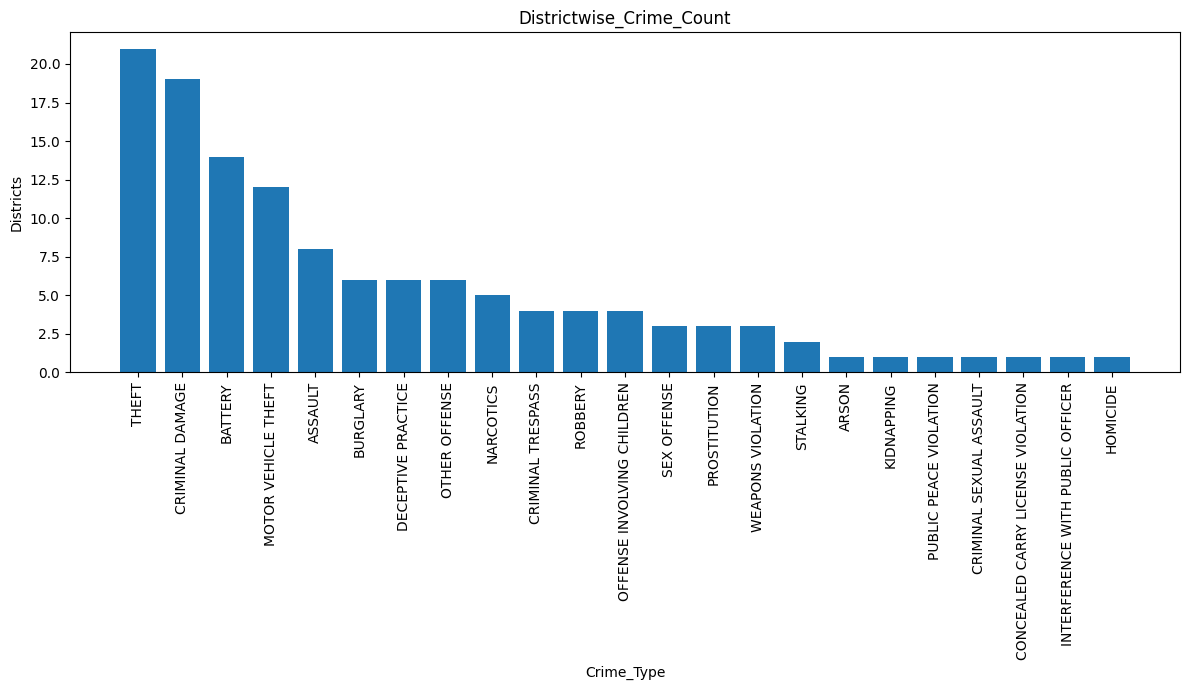

In [199]:
plt.figure(figsize=(12,7))
plt.bar(dist_df['Primary Type'],dist_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('Districts')
plt.title('Districtwise_Crime_Count')
plt.tight_layout()
plt.show()

In [200]:
def district_crime_data():
    data_7 = crime_grp['District'].value_counts().sort_values(ascending=False)
    dist_df = pd.DataFrame(data_7).reset_index()
    return dist_df

In [201]:
district_crime_data()

Primary Type  District  count
0                 THEFT        14     21
1                 THEFT        19     20
2                 THEFT        12     20
3       CRIMINAL DAMAGE         2     19
4                 THEFT         1     17
..                  ...       ...    ...
259  DECEPTIVE PRACTICE        20      1
260  DECEPTIVE PRACTICE        19      1
261  DECEPTIVE PRACTICE         5      1
262   CRIMINAL TRESPASS        25      1
263   WEAPONS VIOLATION        18      1

[264 rows x 3 columns]

In [202]:
def district_crime_plot():
    plt.figure(figsize=(12,7))
    plt.bar(district_crime_data()['Primary Type'],district_crime_data()['count'])
    plt.xticks(rotation=90)
    plt.xlabel('Crime_Type')
    plt.ylabel('Districts')
    plt.title('Districtwise_Crime_Count')
    plt.tight_layout()
    plt.show()

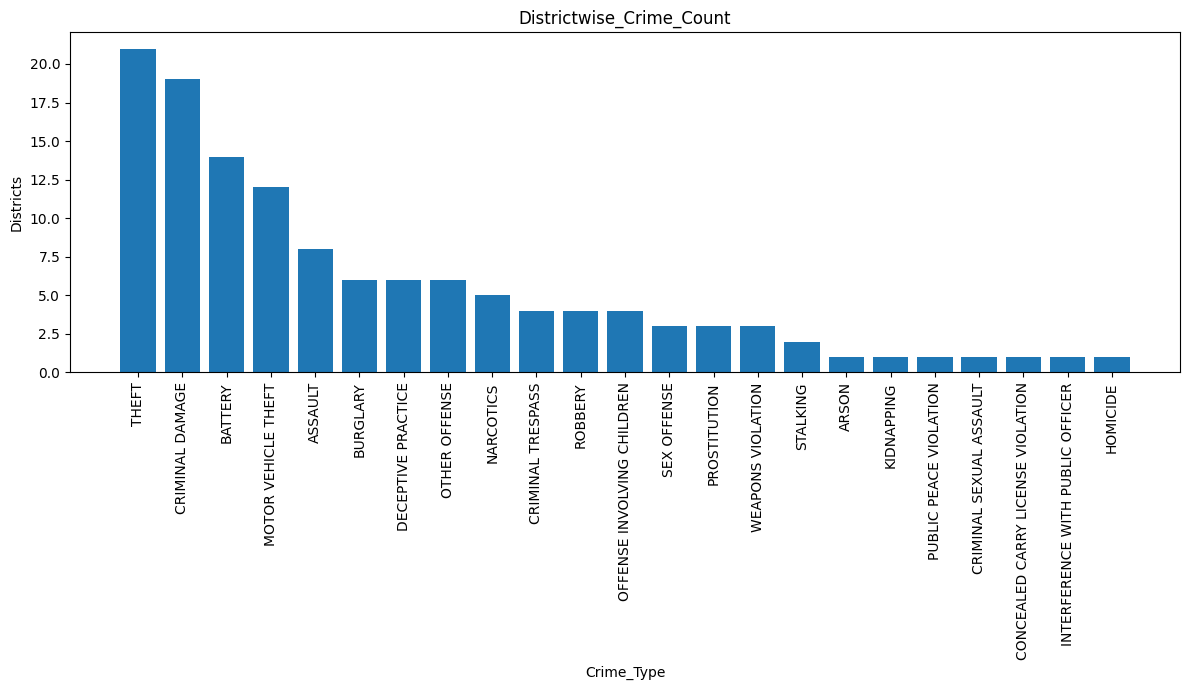

In [203]:
district_crime_plot()

In [204]:
data_8 = crime_grp['Ward'].value_counts().sort_values(ascending=False)
ward_df = pd.DataFrame(data_8).reset_index()
ward_df

Primary Type  Ward  count
0               CRIMINAL DAMAGE  4.00     18
1                       BATTERY 24.00     12
2                         THEFT  4.00     12
3                         THEFT  1.00     11
4                         THEFT 34.00     10
..                          ...   ...    ...
415  OFFENSE INVOLVING CHILDREN 33.00      1
416  OFFENSE INVOLVING CHILDREN 36.00      1
417  OFFENSE INVOLVING CHILDREN 37.00      1
418             CRIMINAL DAMAGE  5.00      1
419           WEAPONS VIOLATION 42.00      1

[420 rows x 3 columns]

In [205]:
data_8

Primary Type                Ward 
CRIMINAL DAMAGE             4.00     18
BATTERY                     24.00    12
THEFT                       4.00     12
                            1.00     11
                            34.00    10
                                     ..
OFFENSE INVOLVING CHILDREN  33.00     1
                            36.00     1
                            37.00     1
CRIMINAL DAMAGE             5.00      1
WEAPONS VIOLATION           42.00     1
Name: count, Length: 420, dtype: int64

In [206]:
ward_std_dev = data_8.std()
ward_std_dev

2.069388149784267

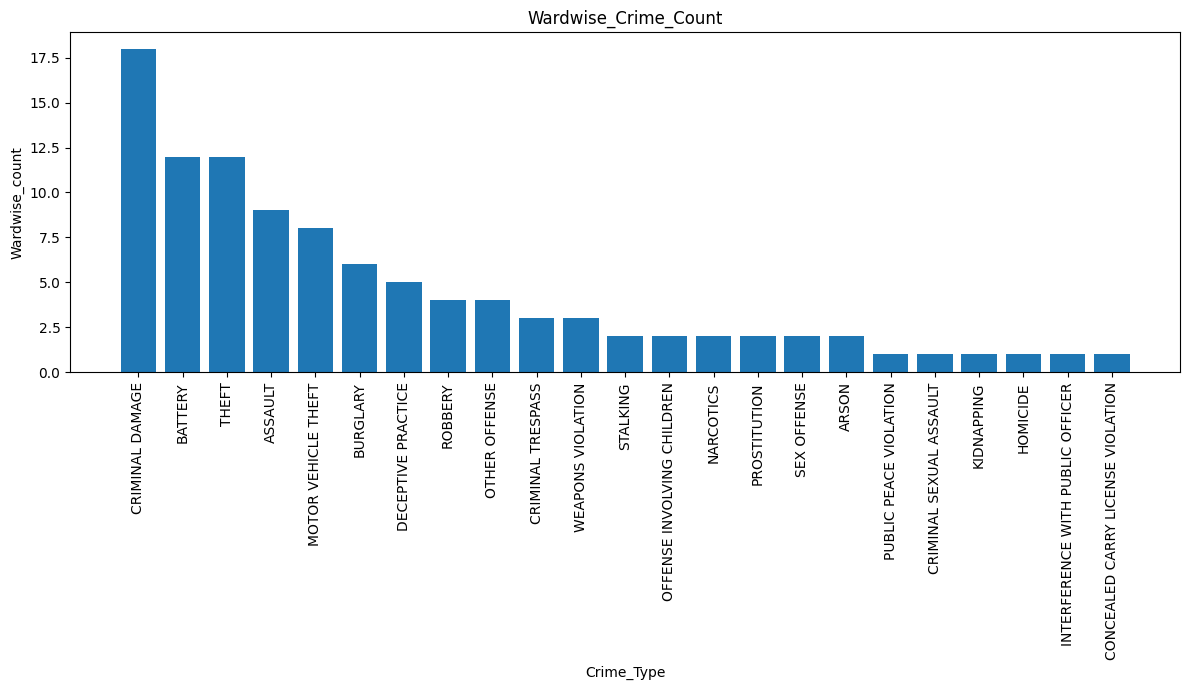

In [207]:
plt.figure(figsize=(12,7))
plt.bar(ward_df['Primary Type'],ward_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('Wardwise_count')
plt.title('Wardwise_Crime_Count')
plt.tight_layout()
plt.show()

In [208]:
def ward_crime_data():
    data_8 = crime_grp['Ward'].value_counts().sort_values(ascending=False)
    ward_df = pd.DataFrame(data_8).reset_index()
    return ward_df

In [209]:
ward_crime_data()

Primary Type  Ward  count
0               CRIMINAL DAMAGE  4.00     18
1                       BATTERY 24.00     12
2                         THEFT  4.00     12
3                         THEFT  1.00     11
4                         THEFT 34.00     10
..                          ...   ...    ...
415  OFFENSE INVOLVING CHILDREN 33.00      1
416  OFFENSE INVOLVING CHILDREN 36.00      1
417  OFFENSE INVOLVING CHILDREN 37.00      1
418             CRIMINAL DAMAGE  5.00      1
419           WEAPONS VIOLATION 42.00      1

[420 rows x 3 columns]

In [210]:
def ward_crime_plot():
    fig = plt.figure(figsize=(12,7))
    plt.bar(ward_crime_data()['Primary Type'],ward_crime_data()['count'])
    plt.xticks(rotation=90)
    plt.xlabel('Crime_Type')
    plt.ylabel('Wardwise_count')
    plt.title('Wardwise_Crime_Count')
    plt.tight_layout()
    plt.show()

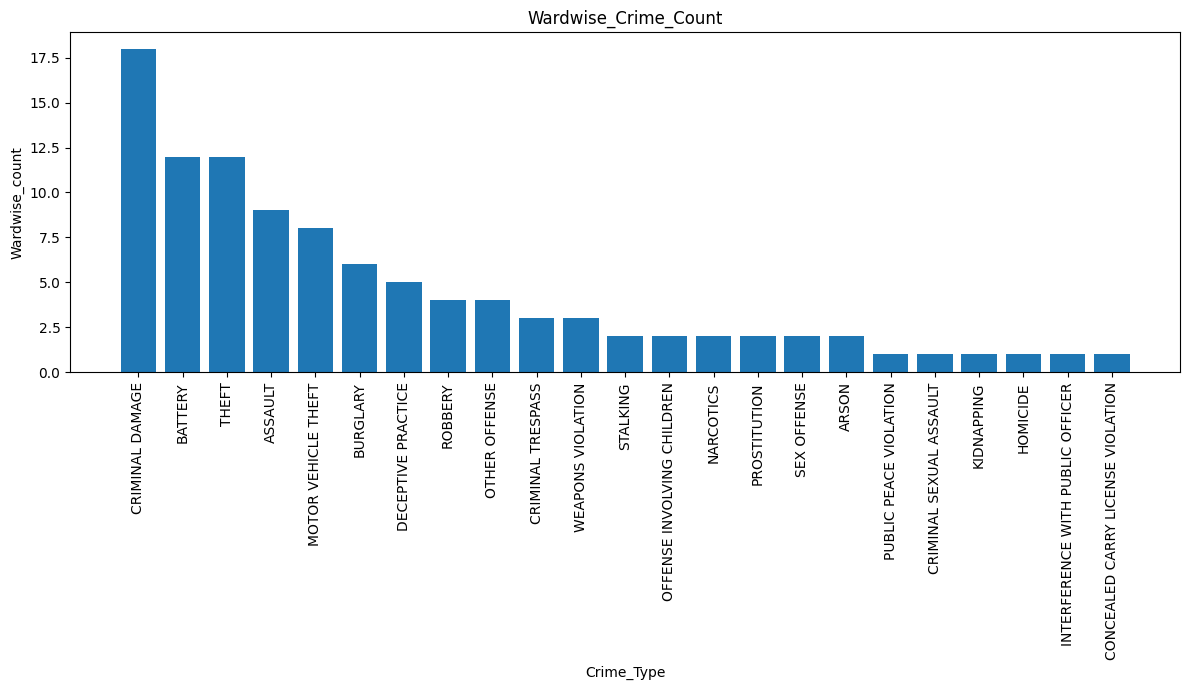

In [211]:
ward_crime_plot()

## Std deviation of districts ##

In [212]:
dist_std_dev

3.605741011940477

## Std deviation of wards ##

In [213]:
ward_std_dev

2.069388149784267

In [214]:
data_7.std()

3.605741011940477

In [215]:
data_7 = crime_grp['District'].value_counts().sort_values(ascending=False)

In [216]:
data_8 = crime_grp['Ward'].value_counts().sort_values(ascending=False)

In [217]:
std_dev_data = {'dist_std_dev':data_7.std(),'ward_std_dev':data_8.std()}
std_dev_data

{'dist_std_dev': 3.605741011940477, 'ward_std_dev': 2.069388149784267}

In [218]:
std_dev_df = pd.DataFrame(std_dev_data,index=([0]))
std_dev_df

dist_std_dev  ward_std_dev
0          3.61          2.07

## Which one has more crime consistency - District or Wards? ##

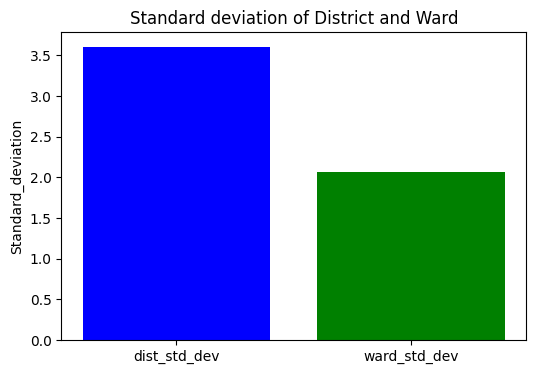

In [219]:
plt.figure(figsize=(6,4))
plt.bar(std_dev_data.keys(),std_dev_data.values(),color=['blue','green'])
plt.title('Standard deviation of District and Ward')
plt.ylabel('Standard_deviation')
plt.show()

## Recommendation: ##

Low Standard deviation indicates that the crime ocuurrence consistency is higher in wards compare to districts and that cause concern.hence,engage beat policing is mandatory in wards.

In [220]:
dist_df

Primary Type  District  count
0                 THEFT        14     21
1                 THEFT        19     20
2                 THEFT        12     20
3       CRIMINAL DAMAGE         2     19
4                 THEFT         1     17
..                  ...       ...    ...
259  DECEPTIVE PRACTICE        20      1
260  DECEPTIVE PRACTICE        19      1
261  DECEPTIVE PRACTICE         5      1
262   CRIMINAL TRESPASS        25      1
263   WEAPONS VIOLATION        18      1

[264 rows x 3 columns]

## Most frequent crime type in districts: ##

In [221]:
dist_df['Primary Type'].mode()

0                ASSAULT
1                BATTERY
2        CRIMINAL DAMAGE
3    MOTOR VEHICLE THEFT
4                  THEFT
Name: Primary Type, dtype: object

In [222]:
data = pd.Series(['ASSAULT', 'BATTERY', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'THEFT'], name='Primary Type')
crime_counts = data.value_counts()
crime_counts

Primary Type
ASSAULT                1
BATTERY                1
CRIMINAL DAMAGE        1
MOTOR VEHICLE THEFT    1
THEFT                  1
Name: count, dtype: int64

In [223]:
df[df['Primary Type'] == 'ASSAULT']['Description'].unique()

array(['SIMPLE', 'AGGRAVATED - KNIFE / CUTTING INSTRUMENT',
       'AGGRAVATED - HANDGUN', 'AGGRAVATED - OTHER DANGEROUS WEAPON'],
      dtype=object)

In [224]:
for i in data:
    col_5 = df[df['Primary Type'] == i]['Description'].unique().tolist()
    print(f"crime_type:{i}")
    print(f"{col_5}")
    print()

crime_type:ASSAULT
['SIMPLE', 'AGGRAVATED - KNIFE / CUTTING INSTRUMENT', 'AGGRAVATED - HANDGUN', 'AGGRAVATED - OTHER DANGEROUS WEAPON']

crime_type:BATTERY
['AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY', 'DOMESTIC BATTERY SIMPLE', 'AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON', 'AGGRAVATED - HANDGUN', 'AGGRAVATED - KNIFE / CUTTING INSTRUMENT', 'SIMPLE', 'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY', 'AGGRAVATED - OTHER DANGEROUS WEAPON', 'AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY', 'PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / MINOR INJURY', 'AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY', 'AGGRAVATED OF A SENIOR CITIZEN', 'AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT']

crime_type:CRIMINAL DAMAGE
['TO VEHICLE', 'TO PROPERTY', 'TO STATE SUPPORTED PROPERTY', 'TO CITY OF CHICAGO PROPERTY']

crime_type:MOTOR VEHICLE THEFT
['AUTOMOBILE', 'ATTEMPT - AUTOMOBILE', 'THEFT / RECOVERY - AUTOMOBILE', 'CYCLE, SCOOTER, BIKE WITH V

In [225]:
type(col_5)

list

In [226]:
crime_dic = {'ASSAULT':['SIMPLE', 'AGGRAVATED - KNIFE / CUTTING INSTRUMENT', 'AGGRAVATED - HANDGUN', 'AGGRAVATED - OTHER DANGEROUS WEAPON'],

'BATTERY':['AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY', 'DOMESTIC BATTERY SIMPLE', 'AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON', 'AGGRAVATED - HANDGUN', 
           'AGGRAVATED - KNIFE / CUTTING INSTRUMENT', 'SIMPLE', 'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY',
             'AGGRAVATED - OTHER DANGEROUS WEAPON', 'AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY', 
             'PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / MINOR INJURY', 'AGG. PROTECTED EMPLOYEE - HANDS, FISTS,FEET, SERIOUS INJURY', 'AGGRAVATED OF A SENIOR CITIZEN', 'AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT'],

'CRIMINAL DAMAGE':['TO VEHICLE', 'TO PROPERTY', 'TO STATE SUPPORTED PROPERTY', 'TO CITY OF CHICAGO PROPERTY'],

'MOTOR VEHICLE THEFT':['AUTOMOBILE', 'ATTEMPT - AUTOMOBILE', 'THEFT / RECOVERY - AUTOMOBILE', 'CYCLE, SCOOTER, BIKE WITH VIN', 'ATTEMPT - CYCLE, SCOOTER, BIKE WITH VIN'],

'THEFT':['$500 AND UNDER', 'OVER $500', 'FROM BUILDING', 'RETAIL THEFT', 'POCKET-PICKING', 'ATTEMPT THEFT']

}

In [227]:
crime_dic

{'ASSAULT': ['SIMPLE',
  'AGGRAVATED - KNIFE / CUTTING INSTRUMENT',
  'AGGRAVATED - HANDGUN',
  'AGGRAVATED - OTHER DANGEROUS WEAPON'],
 'BATTERY': ['AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY',
  'DOMESTIC BATTERY SIMPLE',
  'AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON',
  'AGGRAVATED - HANDGUN',
  'AGGRAVATED - KNIFE / CUTTING INSTRUMENT',
  'SIMPLE',
  'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY',
  'AGGRAVATED - OTHER DANGEROUS WEAPON',
  'AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY',
  'PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / MINOR INJURY',
  'AGG. PROTECTED EMPLOYEE - HANDS, FISTS,FEET, SERIOUS INJURY',
  'AGGRAVATED OF A SENIOR CITIZEN',
  'AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT'],
 'CRIMINAL DAMAGE': ['TO VEHICLE',
  'TO PROPERTY',
  'TO STATE SUPPORTED PROPERTY',
  'TO CITY OF CHICAGO PROPERTY'],
 'MOTOR VEHICLE THEFT': ['AUTOMOBILE',
  'ATTEMPT - AUTOMOBILE',
  'THEFT / RECOVERY - AUTOMOBILE',
  'CYCLE, SCOOTER

In [228]:
l2 =[]
for i in crime_dic.values():
    l2.append(i)

In [229]:
l2

[['SIMPLE',
  'AGGRAVATED - KNIFE / CUTTING INSTRUMENT',
  'AGGRAVATED - HANDGUN',
  'AGGRAVATED - OTHER DANGEROUS WEAPON'],
 ['AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY',
  'DOMESTIC BATTERY SIMPLE',
  'AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON',
  'AGGRAVATED - HANDGUN',
  'AGGRAVATED - KNIFE / CUTTING INSTRUMENT',
  'SIMPLE',
  'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY',
  'AGGRAVATED - OTHER DANGEROUS WEAPON',
  'AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY',
  'PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / MINOR INJURY',
  'AGG. PROTECTED EMPLOYEE - HANDS, FISTS,FEET, SERIOUS INJURY',
  'AGGRAVATED OF A SENIOR CITIZEN',
  'AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT'],
 ['TO VEHICLE',
  'TO PROPERTY',
  'TO STATE SUPPORTED PROPERTY',
  'TO CITY OF CHICAGO PROPERTY'],
 ['AUTOMOBILE',
  'ATTEMPT - AUTOMOBILE',
  'THEFT / RECOVERY - AUTOMOBILE',
  'CYCLE, SCOOTER, BIKE WITH VIN',
  'ATTEMPT - CYCLE, SCOOTER, BIKE WITH VIN'],


In [230]:
l1 = dist_df['Primary Type'].mode().tolist()
l1

['ASSAULT', 'BATTERY', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'THEFT']

In [422]:
dist_df['Primary Type'].mode().value_counts()

Primary Type
ASSAULT                1
BATTERY                1
CRIMINAL DAMAGE        1
MOTOR VEHICLE THEFT    1
THEFT                  1
Name: count, dtype: int64

In [231]:
from itertools import zip_longest

In [232]:
obj = zip_longest(l1,l2)
d = dict(obj)
print(d)

{'ASSAULT': ['SIMPLE', 'AGGRAVATED - KNIFE / CUTTING INSTRUMENT', 'AGGRAVATED - HANDGUN', 'AGGRAVATED - OTHER DANGEROUS WEAPON'], 'BATTERY': ['AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY', 'DOMESTIC BATTERY SIMPLE', 'AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON', 'AGGRAVATED - HANDGUN', 'AGGRAVATED - KNIFE / CUTTING INSTRUMENT', 'SIMPLE', 'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY', 'AGGRAVATED - OTHER DANGEROUS WEAPON', 'AGGRAVATED - HANDS, FISTS, FEET, SERIOUS INJURY', 'PROTECTED EMPLOYEE - HANDS, FISTS, FEET, NO / MINOR INJURY', 'AGG. PROTECTED EMPLOYEE - HANDS, FISTS,FEET, SERIOUS INJURY', 'AGGRAVATED OF A SENIOR CITIZEN', 'AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING INSTRUMENT'], 'CRIMINAL DAMAGE': ['TO VEHICLE', 'TO PROPERTY', 'TO STATE SUPPORTED PROPERTY', 'TO CITY OF CHICAGO PROPERTY'], 'MOTOR VEHICLE THEFT': ['AUTOMOBILE', 'ATTEMPT - AUTOMOBILE', 'THEFT / RECOVERY - AUTOMOBILE', 'CYCLE, SCOOTER, BIKE WITH VIN', 'ATTEMPT - CYCLE, SCOOTER, 

In [233]:
# Step 1: Find the maximum length of the lists
max_length = max(len(lst) for lst in d.values())

# Step 2: Extend all lists to the maximum length with None
for key, value in d.items():
    if len(value) < max_length:
        value.extend([None] * (max_length - len(value)))

# Now create the DataFrame
crime_dic_df = pd.DataFrame(d)


In [234]:
crime_dic_df.dropna(inplace=True)

In [235]:
crime_dic_df

ASSAULT  \
0                                   SIMPLE   
1  AGGRAVATED - KNIFE / CUTTING INSTRUMENT   
2                     AGGRAVATED - HANDGUN   
3      AGGRAVATED - OTHER DANGEROUS WEAPON   

                                             BATTERY  \
0  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
1                            DOMESTIC BATTERY SIMPLE   
2  AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...   
3                               AGGRAVATED - HANDGUN   

               CRIMINAL DAMAGE            MOTOR VEHICLE THEFT           THEFT  
0                   TO VEHICLE                     AUTOMOBILE  $500 AND UNDER  
1                  TO PROPERTY           ATTEMPT - AUTOMOBILE       OVER $500  
2  TO STATE SUPPORTED PROPERTY  THEFT / RECOVERY - AUTOMOBILE   FROM BUILDING  
3  TO CITY OF CHICAGO PROPERTY  CYCLE, SCOOTER, BIKE WITH VIN    RETAIL THEFT

In [424]:
dist_df

Primary Type  District  count
0                 THEFT        14     21
1                 THEFT        19     20
2                 THEFT        12     20
3       CRIMINAL DAMAGE         2     19
4                 THEFT         1     17
..                  ...       ...    ...
259  DECEPTIVE PRACTICE        20      1
260  DECEPTIVE PRACTICE        19      1
261  DECEPTIVE PRACTICE         5      1
262   CRIMINAL TRESPASS        25      1
263   WEAPONS VIOLATION        18      1

[264 rows x 3 columns]

Text(0.5, 1.0, 'District - Recurring Crimes')

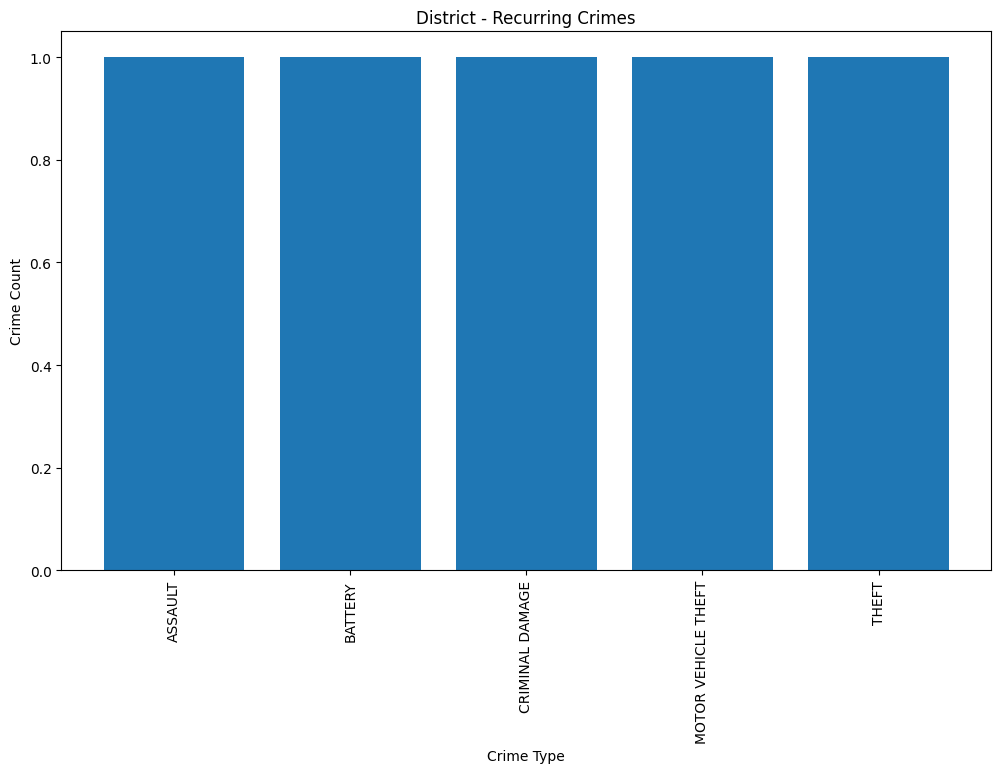

In [425]:
fig,ax=plt.subplots(figsize=(12,7))
ax.bar(dist_df['Primary Type'].mode().tolist(),dist_df['Primary Type'].mode().value_counts())
plt.xticks(rotation=90)
ax.set_xlabel('Crime Type')
ax.set_ylabel('Crime Count')
ax.set_title('District - Recurring Crimes')


In [418]:
crime_counts

Primary Type
ASSAULT                1
BATTERY                1
CRIMINAL DAMAGE        1
MOTOR VEHICLE THEFT    1
THEFT                  1
Name: count, dtype: int64

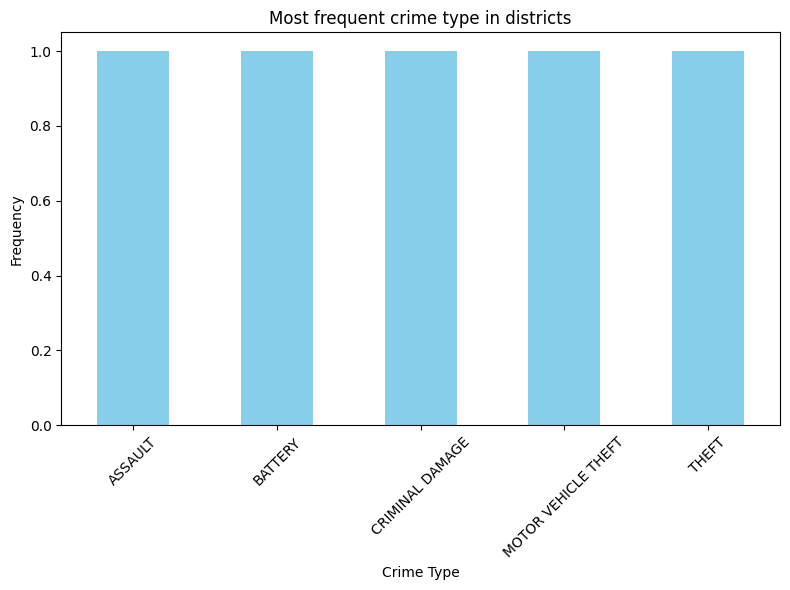

In [236]:
plt.figure(figsize=(8,6))
crime_counts.plot(kind='bar',color='skyblue')
plt.title('Most frequent crime type in districts')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.tight_layout()


In [430]:
ward_df['Primary Type'].mode().tolist()

['THEFT']

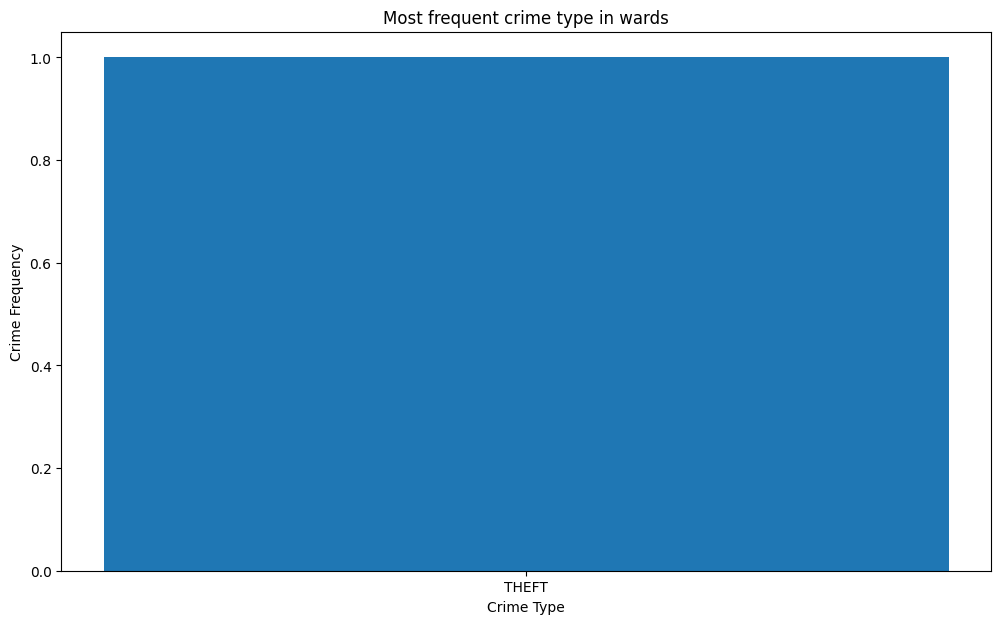

In [431]:
fig,ax = plt.subplots(figsize=(12,7))
ax.bar(ward_df['Primary Type'].mode().tolist(),ward_df['Primary Type'].mode().value_counts())
ax.set_title('Most frequent crime type in wards')
ax.set_xlabel('Crime Type')
ax.set_ylabel('Crime Frequency')
plt.show()


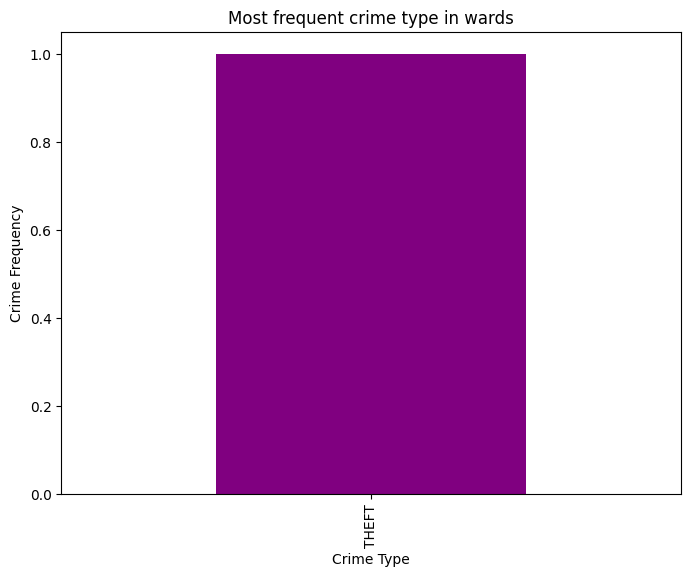

In [237]:
ward_df['Primary Type'].mode()
ward_data = pd.Series(['THEFT'],name='Primary Type')
ward_counts = ward_data.value_counts()
plt.figure(figsize=(8,6))
ward_counts.plot(kind='bar',color='purple')
plt.title('Most frequent crime type in wards')
plt.xlabel('Crime Type')
plt.ylabel('Crime Frequency')
plt.show()


## Arrest and Domestic incident analysis ##

In [238]:
data_3 = crime_grp[['Date','Location Description','Arrest']].value_counts(normalize=True).sort_values(ascending=False)
arrest_df = pd.DataFrame(data_3).reset_index()
arrest_df.rename(columns={'proportion':'Arrest_rate'},inplace=True)

In [239]:
arrest_df.drop(['Arrest'],axis=1,inplace=True)

In [240]:
arrest_df

Primary Type                Date  \
0    CONCEALED CARRY LICENSE VIOLATION 2023-09-06 07:40:00   
1                           KIDNAPPING 2023-04-19 11:30:00   
2     INTERFERENCE WITH PUBLIC OFFICER 2023-09-06 22:09:00   
3               PUBLIC PEACE VIOLATION 2023-09-07 11:44:00   
4               PUBLIC PEACE VIOLATION 2023-09-06 21:58:00   
..                                 ...                 ...   
926                              THEFT 2023-09-06 08:40:00   
927                              THEFT 2023-09-06 08:40:00   
928                              THEFT 2023-09-06 08:48:00   
929                              THEFT 2023-09-06 09:00:00   
930                              THEFT 2023-09-06 10:00:00   

                                Location Description  Arrest_rate  
0     AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA         1.00  
1                                             STREET         1.00  
2                                             STREET         1.00  
3                                          APARTMENT         0.33  
4                                          APARTMENT         0.33  
..                                               ...          ...  
926                                        APARTMENT         0.00  
927                                      GAS STATION         0.00  
928                                           STREET         0.00  
929            CHURCH / SYNAGOGUE / PLACE OF WORSHIP         0.00  
930  AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA         0.00  

[931 rows x 4 columns]

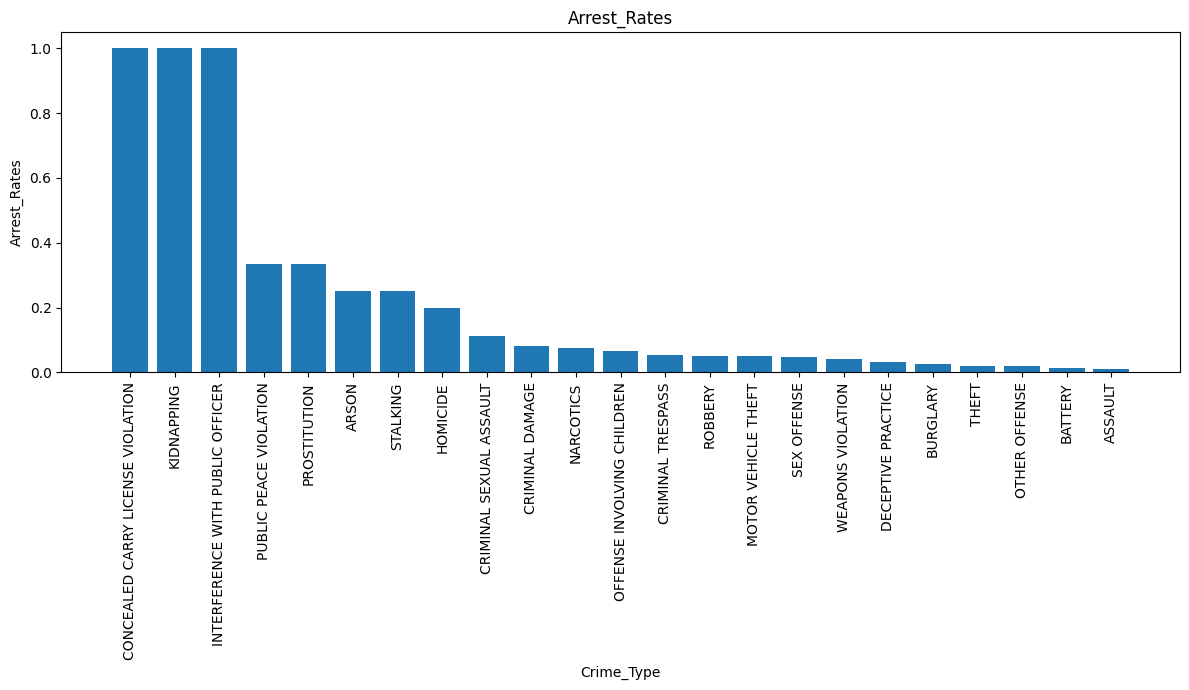

In [241]:
plt.figure(figsize=(12,7))
plt.bar(arrest_df['Primary Type'],arrest_df['Arrest_rate'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('Arrest_Rates')
plt.title('Arrest_Rates')
plt.tight_layout()
plt.show()

In [242]:
def arrest_rate():
    data_3 = crime_grp[['Date','Location Description','Arrest']].value_counts(normalize=True).sort_values(ascending=False)
    arrest_df = pd.DataFrame(data_3).reset_index()
    arrest_df.rename(columns={'proportion':'Arrest_rate'},inplace=True)
    arrest_df.drop(['Arrest'],axis=1,inplace=True)
    return arrest_df
    

In [243]:
arrest_rate()

Primary Type                Date  \
0    CONCEALED CARRY LICENSE VIOLATION 2023-09-06 07:40:00   
1                           KIDNAPPING 2023-04-19 11:30:00   
2     INTERFERENCE WITH PUBLIC OFFICER 2023-09-06 22:09:00   
3               PUBLIC PEACE VIOLATION 2023-09-07 11:44:00   
4               PUBLIC PEACE VIOLATION 2023-09-06 21:58:00   
..                                 ...                 ...   
926                              THEFT 2023-09-06 08:40:00   
927                              THEFT 2023-09-06 08:40:00   
928                              THEFT 2023-09-06 08:48:00   
929                              THEFT 2023-09-06 09:00:00   
930                              THEFT 2023-09-06 10:00:00   

                                Location Description  Arrest_rate  
0     AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA         1.00  
1                                             STREET         1.00  
2                                             STREET         1.00  
3                                          APARTMENT         0.33  
4                                          APARTMENT         0.33  
..                                               ...          ...  
926                                        APARTMENT         0.00  
927                                      GAS STATION         0.00  
928                                           STREET         0.00  
929            CHURCH / SYNAGOGUE / PLACE OF WORSHIP         0.00  
930  AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA         0.00  

[931 rows x 4 columns]

In [244]:
def arrest_rate_plot():
    fig = plt.figure(figsize=(12,7))
    plt.bar(arrest_rate()['Primary Type'],arrest_rate()['Arrest_rate'])
    plt.xticks(rotation=90)
    plt.xlabel('Crime_Type')
    plt.ylabel('Arrest_Rates')
    plt.title('Arrest_Rates')
    plt.tight_layout()
    plt.show()

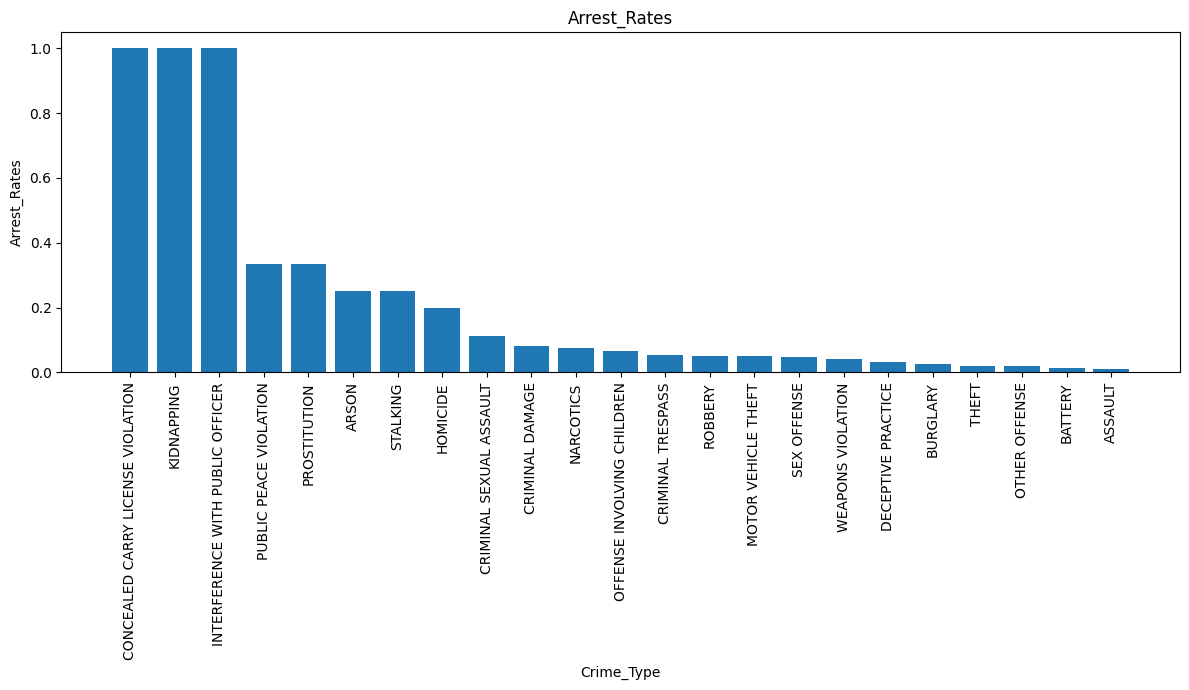

In [245]:
arrest_rate_plot()

In [246]:
df[['Primary Type','Domestic','Description']]

Primary Type  Domestic  \
1               HOMICIDE     False   
2               HOMICIDE     False   
3               BURGLARY     False   
4                BATTERY     False   
6        CRIMINAL DAMAGE     False   
..                   ...       ...   
994                THEFT     False   
995  MOTOR VEHICLE THEFT     False   
996   DECEPTIVE PRACTICE     False   
997              BATTERY      True   
998      CRIMINAL DAMAGE     False   

                                           Description  
1                                  FIRST DEGREE MURDER  
2                                  FIRST DEGREE MURDER  
3                                       UNLAWFUL ENTRY  
4    AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...  
6                                           TO VEHICLE  
..                                                 ...  
994                                     $500 AND UNDER  
995                                         AUTOMOBILE  
996                           FRAUD OR CONFIDENCE GAME  
997                            DOMESTIC BATTERY SIMPLE  
998                                        TO PROPERTY  

[977 rows x 3 columns]

In [247]:
domestic_crimes = df['Domestic'] == True
data_5 = df.loc[domestic_crimes]['Primary Type']
domestic_crime_df = pd.DataFrame(data_5)
domestic_crime_df

Primary Type
16   OFFENSE INVOLVING CHILDREN
23                      ASSAULT
25      CRIMINAL SEXUAL ASSAULT
31                  SEX OFFENSE
32                OTHER OFFENSE
..                          ...
974         MOTOR VEHICLE THEFT
976                     BATTERY
986                     BATTERY
991                     BATTERY
997                     BATTERY

[199 rows x 1 columns]

In [248]:
domestic_crime_df.rename(columns={'Primary Type':'Domestic_crime'},inplace=True)
domestic_crime_df

Domestic_crime
16   OFFENSE INVOLVING CHILDREN
23                      ASSAULT
25      CRIMINAL SEXUAL ASSAULT
31                  SEX OFFENSE
32                OTHER OFFENSE
..                          ...
974         MOTOR VEHICLE THEFT
976                     BATTERY
986                     BATTERY
991                     BATTERY
997                     BATTERY

[199 rows x 1 columns]

In [249]:
def domestic_crime():
    domestic_crimes = df['Domestic'] == True
    data_5 = df.loc[domestic_crimes]['Primary Type']
    domestic_crime_df = pd.DataFrame(data_5)
    domestic_crime_df.rename(columns={'Primary Type':'Domestic_crime'},inplace=True)
    return domestic_crime_df

In [250]:
domestic_crime()

Domestic_crime
16   OFFENSE INVOLVING CHILDREN
23                      ASSAULT
25      CRIMINAL SEXUAL ASSAULT
31                  SEX OFFENSE
32                OTHER OFFENSE
..                          ...
974         MOTOR VEHICLE THEFT
976                     BATTERY
986                     BATTERY
991                     BATTERY
997                     BATTERY

[199 rows x 1 columns]

In [251]:
non_dome_crime = df['Domestic'] == False
data_6 = df[non_dome_crime]['Primary Type']
non_dom_crime_df = pd.DataFrame(data_6)
non_dom_crime_df


Primary Type
1               HOMICIDE
2               HOMICIDE
3               BURGLARY
4                BATTERY
6        CRIMINAL DAMAGE
..                   ...
993    WEAPONS VIOLATION
994                THEFT
995  MOTOR VEHICLE THEFT
996   DECEPTIVE PRACTICE
998      CRIMINAL DAMAGE

[778 rows x 1 columns]

In [252]:
non_dom_crime_df.rename(columns={'Primary Type':'Non_domestic_crime'},inplace=True)

In [253]:
def non_domestic_crime():
    non_dome_crime = df['Domestic'] == False
    data_6 = df[non_dome_crime]['Primary Type']
    non_dom_crime_df = pd.DataFrame(data_6)
    non_dom_crime_df.rename(columns={'Primary Type':'Non_domestic_crime'},inplace=True)
    return non_dom_crime_df


In [254]:
non_domestic_crime()

Non_domestic_crime
1               HOMICIDE
2               HOMICIDE
3               BURGLARY
4                BATTERY
6        CRIMINAL DAMAGE
..                   ...
993    WEAPONS VIOLATION
994                THEFT
995  MOTOR VEHICLE THEFT
996   DECEPTIVE PRACTICE
998      CRIMINAL DAMAGE

[778 rows x 1 columns]

In [255]:
crime_type_df = pd.concat([domestic_crime_df,non_dom_crime_df],axis=1)

In [256]:
def crime_type():
    crime_type_df = pd.concat([domestic_crime_df,non_dom_crime_df],axis=1)
    return crime_type_df

In [257]:
def crime_type():
    crime_type_df = pd.concat([domestic_crime(),non_domestic_crime()],axis=1)
    crime_type_df.rename(columns={'Primary Type':'Domestic_crimes'})
    return crime_type_df

In [258]:
crime_type_df.dropna()

Empty DataFrame
Columns: [Domestic_crime, Non_domestic_crime]
Index: []

In [259]:
crime_type()

Domestic_crime   Non_domestic_crime
16   OFFENSE INVOLVING CHILDREN                  NaN
23                      ASSAULT                  NaN
25      CRIMINAL SEXUAL ASSAULT                  NaN
31                  SEX OFFENSE                  NaN
32                OTHER OFFENSE                  NaN
..                          ...                  ...
993                         NaN    WEAPONS VIOLATION
994                         NaN                THEFT
995                         NaN  MOTOR VEHICLE THEFT
996                         NaN   DECEPTIVE PRACTICE
998                         NaN      CRIMINAL DAMAGE

[977 rows x 2 columns]

In [260]:
crime_type_df.rename(columns={'Primary Type':'Domestic_crimes'})

Domestic_crime   Non_domestic_crime
16   OFFENSE INVOLVING CHILDREN                  NaN
23                      ASSAULT                  NaN
25      CRIMINAL SEXUAL ASSAULT                  NaN
31                  SEX OFFENSE                  NaN
32                OTHER OFFENSE                  NaN
..                          ...                  ...
993                         NaN    WEAPONS VIOLATION
994                         NaN                THEFT
995                         NaN  MOTOR VEHICLE THEFT
996                         NaN   DECEPTIVE PRACTICE
998                         NaN      CRIMINAL DAMAGE

[977 rows x 2 columns]

In [261]:
crime_type_df

Domestic_crime   Non_domestic_crime
16   OFFENSE INVOLVING CHILDREN                  NaN
23                      ASSAULT                  NaN
25      CRIMINAL SEXUAL ASSAULT                  NaN
31                  SEX OFFENSE                  NaN
32                OTHER OFFENSE                  NaN
..                          ...                  ...
993                         NaN    WEAPONS VIOLATION
994                         NaN                THEFT
995                         NaN  MOTOR VEHICLE THEFT
996                         NaN   DECEPTIVE PRACTICE
998                         NaN      CRIMINAL DAMAGE

[977 rows x 2 columns]

In [262]:
def domeestic_crime():
    dome_data = crime_type_df['Domestic_crime'].value_counts().sort_values(ascending=False)
    dome_data_df = pd.DataFrame(dome_data).reset_index()
    return dome_data_df

In [263]:
def non_dome_crime_new():
    non_dome_data = crime_type_df['Non_domestic_crime'].value_counts().sort_values(ascending=False)
    non_dome_data_df = pd.DataFrame(non_dome_data).reset_index()
    return non_dome_data_df

In [264]:
non_dome_crime_new()

Non_domestic_crime  count
0                               THEFT    195
1                 MOTOR VEHICLE THEFT     97
2                     CRIMINAL DAMAGE     95
3                             ASSAULT     64
4                             BATTERY     64
5                  DECEPTIVE PRACTICE     61
6                             ROBBERY     38
7                            BURGLARY     35
8                       OTHER OFFENSE     30
9                   WEAPONS VIOLATION     25
10                  CRIMINAL TRESPASS     18
11                        SEX OFFENSE     15
12                          NARCOTICS     13
13            CRIMINAL SEXUAL ASSAULT      5
14                           HOMICIDE      5
15                              ARSON      4
16             PUBLIC PEACE VIOLATION      3
17                           STALKING      3
18                       PROSTITUTION      3
19         OFFENSE INVOLVING CHILDREN      2
20                         KIDNAPPING      1
21  CONCEALED CARRY LICENSE VIOLATION      1
22   INTERFERENCE WITH PUBLIC OFFICER      1

In [265]:
domeestic_crime()

Domestic_crime  count
0                      BATTERY     86
1                      ASSAULT     30
2                OTHER OFFENSE     23
3              CRIMINAL DAMAGE     16
4   OFFENSE INVOLVING CHILDREN     13
5                        THEFT      8
6                  SEX OFFENSE      6
7      CRIMINAL SEXUAL ASSAULT      4
8          MOTOR VEHICLE THEFT      4
9                     BURGLARY      3
10                     ROBBERY      2
11          DECEPTIVE PRACTICE      2
12                    STALKING      1
13           CRIMINAL TRESPASS      1

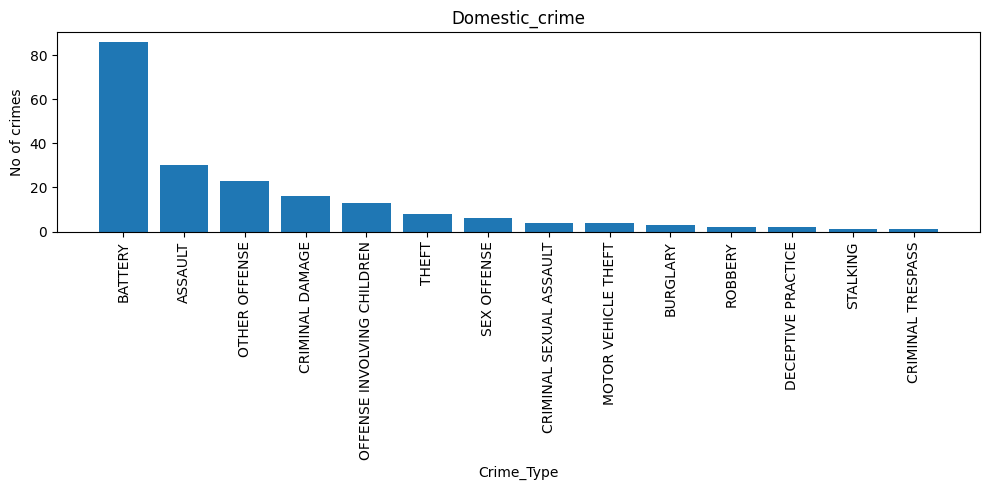

In [266]:
domestic_crime_counts = crime_type_df['Domestic_crime'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(domestic_crime_counts.index.astype(str),crime_type_df['Domestic_crime'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('No of crimes')
plt.title('Domestic_crime')
plt.tight_layout()
plt.show()

In [267]:
def domestic_crime_count_plot():
    domestic_crime_counts = crime_type()['Domestic_crime'].value_counts()
    plt.figure(figsize=(10,5))
    plt.bar(domestic_crime_counts.index.astype(str),crime_type()['Domestic_crime'].value_counts())
    plt.xticks(rotation=90)
    plt.xlabel('Crime_Type')
    plt.ylabel('No of crimes')
    plt.title('Domestic_crime')
    plt.tight_layout()
    plt.show()

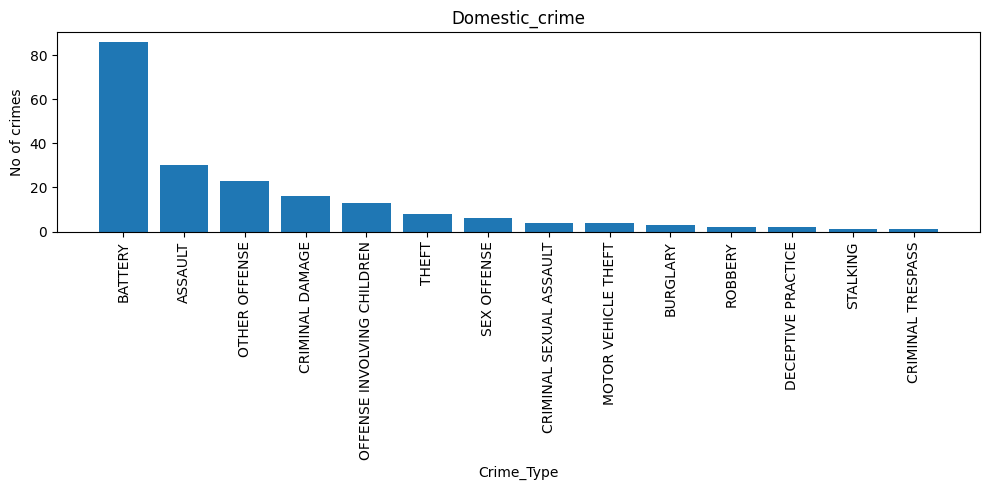

In [268]:
domestic_crime_count_plot()

In [269]:
crime_type_df['Non_domestic_crime'].describe()

count       778
unique       23
top       THEFT
freq        195
Name: Non_domestic_crime, dtype: object

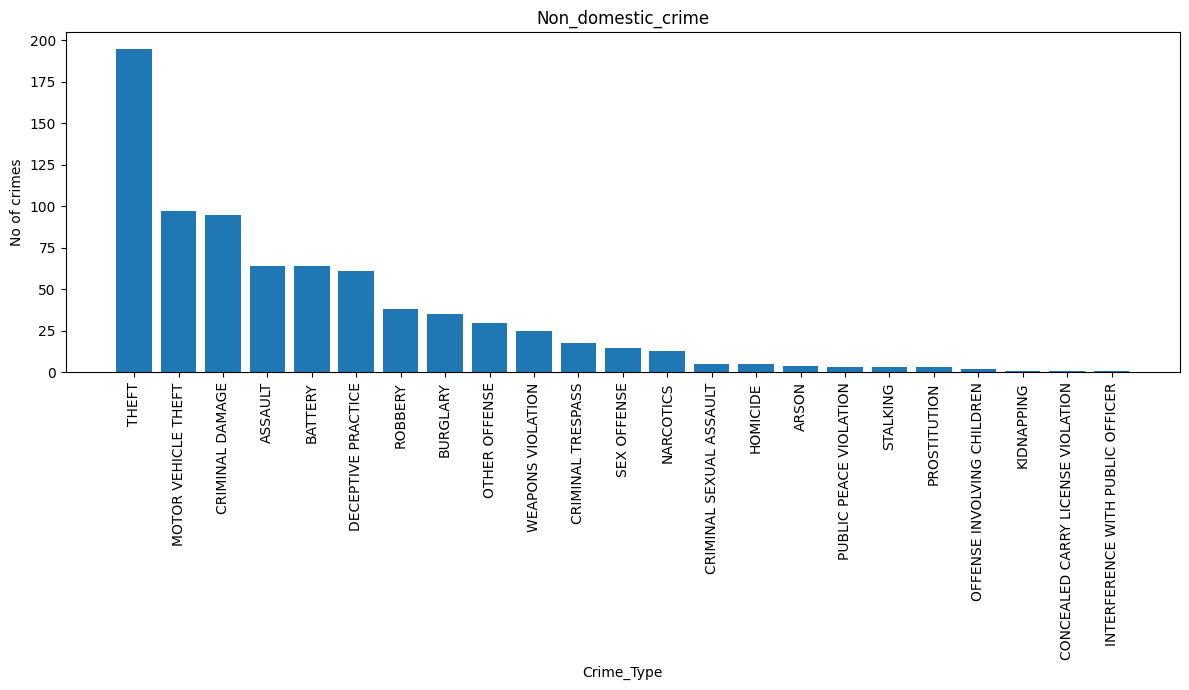

In [270]:
non_domestic_crime_counts = crime_type_df['Non_domestic_crime'].value_counts()

plt.figure(figsize=(12,7))
plt.bar(non_domestic_crime_counts.index.astype(str),crime_type_df['Non_domestic_crime'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('No of crimes')
plt.title('Non_domestic_crime')
plt.tight_layout()
plt.show()

In [271]:
def non_domestic_crime_plot():
    non_domestic_crime_counts = crime_type()['Non_domestic_crime'].value_counts()
    plt.figure(figsize=(12,7))
    plt.bar(non_domestic_crime_counts.index.astype(str),crime_type()['Non_domestic_crime'].value_counts())
    plt.xticks(rotation=90)
    plt.xlabel('Crime_Type')
    plt.ylabel('No of crimes')
    plt.title('Non_domestic_crime')
    plt.tight_layout()
    plt.show()

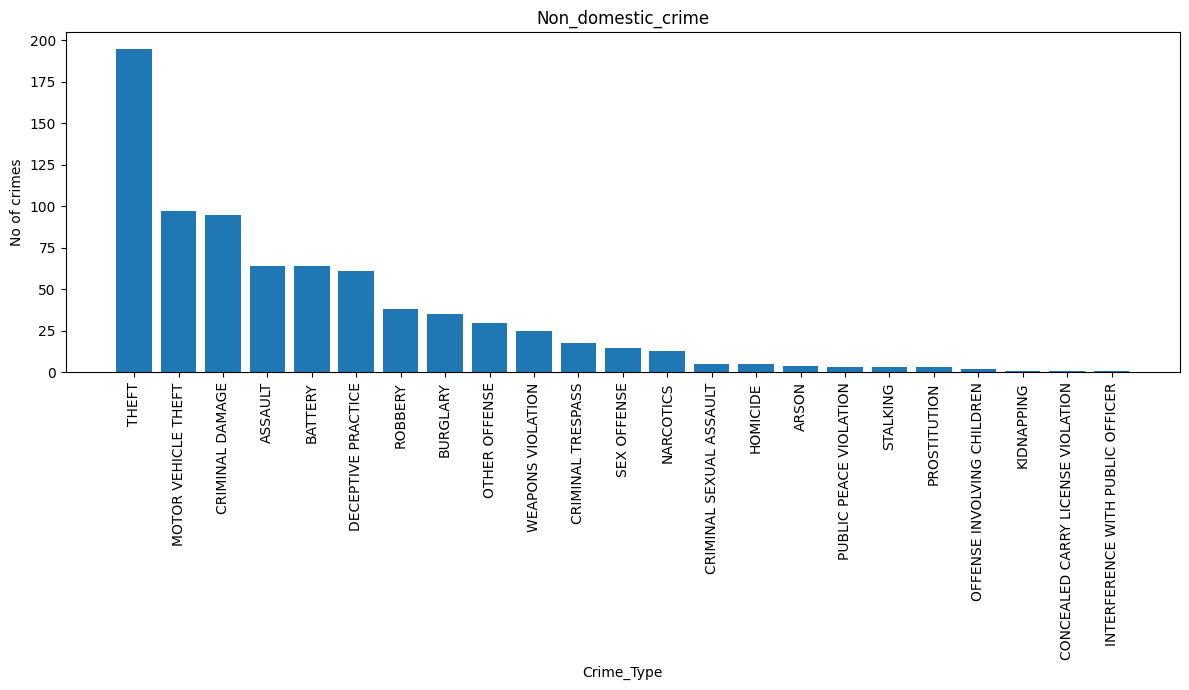

In [272]:
non_domestic_crime_plot()

## Domestic vs. Non-Domestic Crimes : Which is high? ##

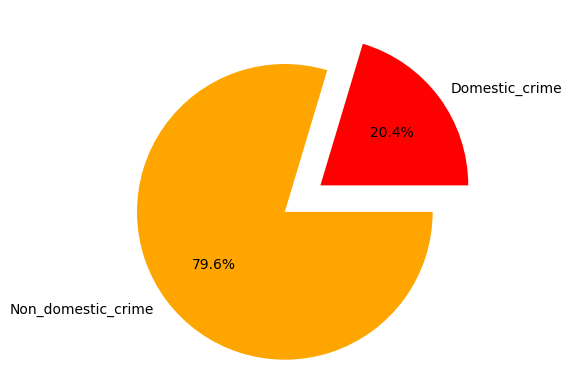

In [273]:
values = [crime_type_df['Domestic_crime'].value_counts().sum(),crime_type_df['Non_domestic_crime'].value_counts().sum()]
category = [crime_type_df.columns[0],crime_type_df.columns[1]]
color = ['red','orange']
explod = [0.1,0.2]
plt.pie(values,labels=category,colors = color,explode=explod,autopct="%1.1f%%")
plt.legend
plt.show()

In [274]:
crime_type()

Domestic_crime   Non_domestic_crime
16   OFFENSE INVOLVING CHILDREN                  NaN
23                      ASSAULT                  NaN
25      CRIMINAL SEXUAL ASSAULT                  NaN
31                  SEX OFFENSE                  NaN
32                OTHER OFFENSE                  NaN
..                          ...                  ...
993                         NaN    WEAPONS VIOLATION
994                         NaN                THEFT
995                         NaN  MOTOR VEHICLE THEFT
996                         NaN   DECEPTIVE PRACTICE
998                         NaN      CRIMINAL DAMAGE

[977 rows x 2 columns]

In [275]:
def domestic_vs_non_domestic():
    values = [crime_type()['Domestic_crime'].value_counts().sum(),crime_type()['Non_domestic_crime'].value_counts().sum()]
    category = [crime_type().columns[0],crime_type().columns[1]]
    color = ['red','orange']
    explod = [0.1,0.2]
    plt.pie(values,labels=category,colors = color,explode=explod,autopct="%1.1f%%")
    plt.legend
    plt.show()

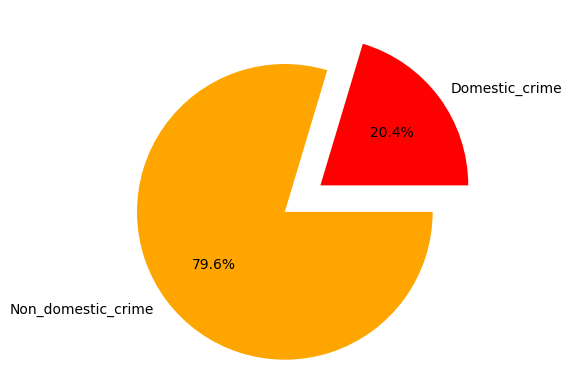

In [276]:
domestic_vs_non_domestic()

In [277]:
def domestic_vs_non_domestic():
    fig,ax = plt.subplots(figsize=(10,6))
    crime_data = crime_type()
    values = [crime_data['Domestic_crime'].value_counts().sum(),crime_data['Non_domestic_crime'].value_counts().sum()]
    category = [crime_data.columns[0],crime_data.columns[1]]
    color = ['red','orange']
    explod = [0.1,0.2]
    ax.pie(values,labels=category,colors = color,explode=explod,autopct="%1.1f%%")
    ax.set_title('DOMESTIC VS NON-DOMESTIC CRIMES -WHICH IS HIGH?')
    ax.legend()
    return fig

In [278]:
def non_dome_crime_new():
    non_dome_data = crime_type_df['Non_domestic_crime'].value_counts().sort_values(ascending=False)
    non_dome_data_df = pd.DataFrame(non_dome_data).reset_index()
    return non_dome_data_df

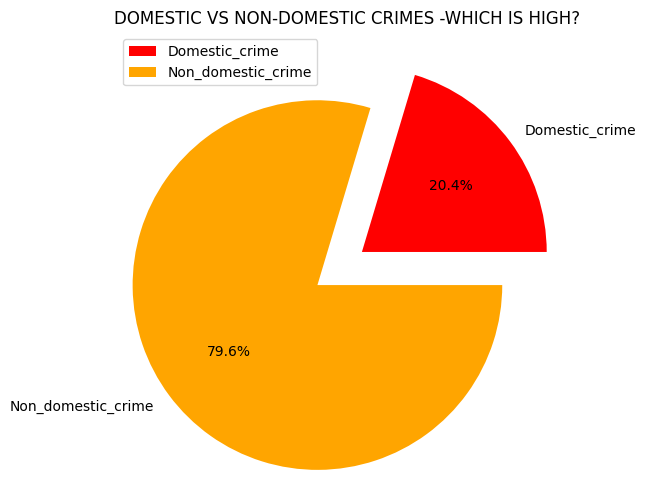

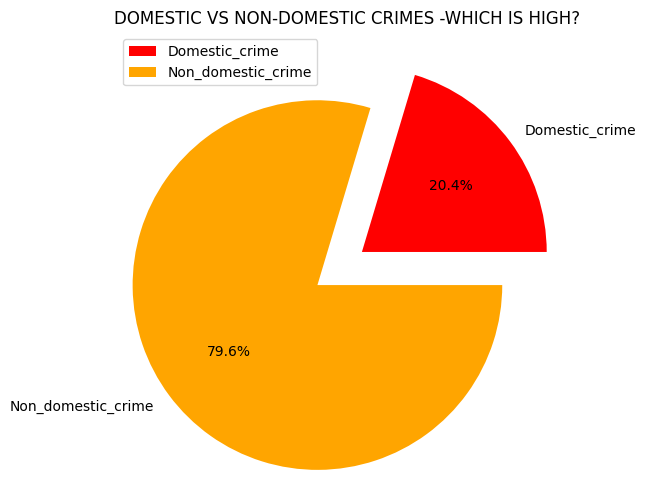

In [279]:
domestic_vs_non_domestic()

## Crime Type Analysis ##

In [280]:
crm_type = crime_grp['Description'].value_counts().sort_values(ascending=False)
crm_type_df = pd.DataFrame(crm_type).reset_index()
crm_type_df

Primary Type                            Description  count
0                         THEFT                         $500 AND UNDER     73
1           MOTOR VEHICLE THEFT                             AUTOMOBILE     72
2                         THEFT                              OVER $500     69
3                       BATTERY                DOMESTIC BATTERY SIMPLE     69
4               CRIMINAL DAMAGE                             TO VEHICLE     67
..                          ...                                    ...    ...
116  OFFENSE INVOLVING CHILDREN                        CHILD ABDUCTION      1
117  OFFENSE INVOLVING CHILDREN                      CHILD PORNOGRAPHY      1
118               OTHER OFFENSE     GUN OFFENDER - ANNUAL REGISTRATION      1
119               OTHER OFFENSE                      LICENSE VIOLATION      1
120           WEAPONS VIOLATION  UNLAWFUL USE - OTHER DANGEROUS WEAPON      1

[121 rows x 3 columns]

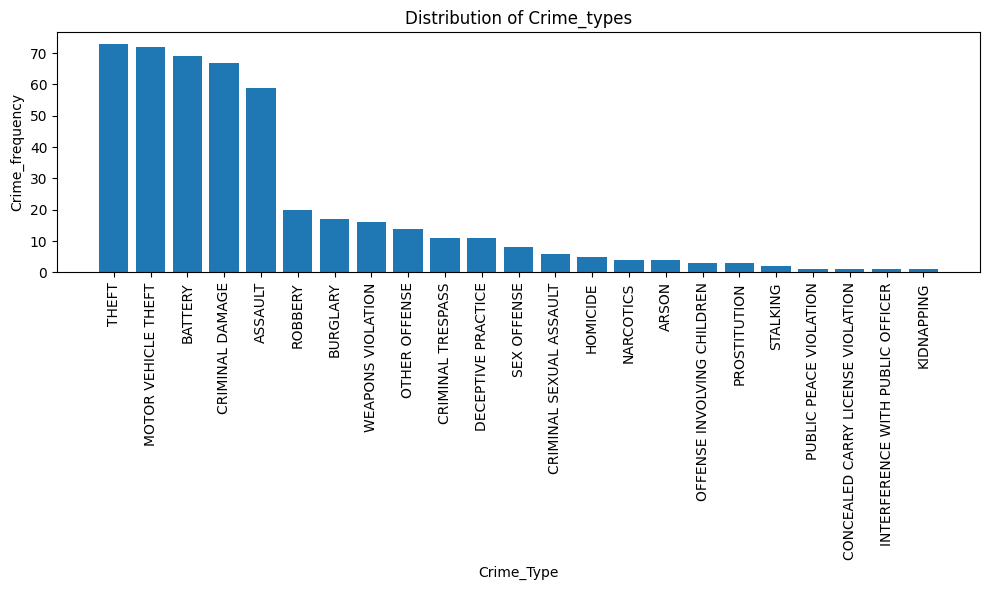

In [281]:
plt.figure(figsize=(10,6))
plt.bar(crm_type_df['Primary Type'],crm_type_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('Crime_frequency')
plt.title('Distribution of Crime_types')
plt.tight_layout()
plt.show()

In [282]:
def crime_distribution():
    crm_type = crime_grp['Description'].value_counts().sort_values(ascending=False)
    crm_type_df = pd.DataFrame(crm_type).reset_index()
    return crm_type_df

In [283]:
crime_distribution()

Primary Type                            Description  count
0                         THEFT                         $500 AND UNDER     73
1           MOTOR VEHICLE THEFT                             AUTOMOBILE     72
2                         THEFT                              OVER $500     69
3                       BATTERY                DOMESTIC BATTERY SIMPLE     69
4               CRIMINAL DAMAGE                             TO VEHICLE     67
..                          ...                                    ...    ...
116  OFFENSE INVOLVING CHILDREN                        CHILD ABDUCTION      1
117  OFFENSE INVOLVING CHILDREN                      CHILD PORNOGRAPHY      1
118               OTHER OFFENSE     GUN OFFENDER - ANNUAL REGISTRATION      1
119               OTHER OFFENSE                      LICENSE VIOLATION      1
120           WEAPONS VIOLATION  UNLAWFUL USE - OTHER DANGEROUS WEAPON      1

[121 rows x 3 columns]

In [284]:
def crime_distribution_plot():
    fig = plt.figure(figsize=(10,6))
    plt.bar(crime_distribution()['Primary Type'],crime_distribution()['count'])
    plt.xticks(rotation=90)
    plt.xlabel('Crime_Type')
    plt.ylabel('Crime_frequency')
    plt.title('Distribution of Crime_types')
    plt.tight_layout()
    plt.show()

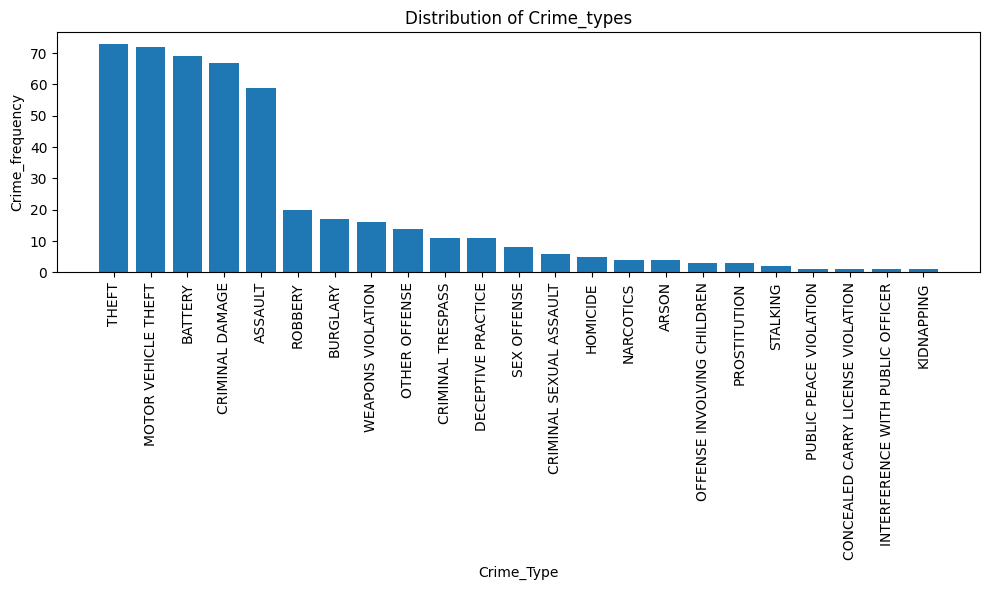

In [285]:
crime_distribution_plot()

## Severity Analysis ##

In [286]:
severe_crimes = ['HOMICIDE', 'ASSAULT', 'BATTERY', 'ROBBERY', 'CRIM SEXUAL ASSAULT']
less_severe_crimes = ['THEFT', 'FRAUD', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'PUBLIC PEACE VIOLATION']

In [287]:
df['severity'] = df['Primary Type'].apply(lambda x: 'severe' if x in severe_crimes else 'less_severe' if x in less_severe_crimes else 'other')

In [288]:
df.head(2)

ID Case Number                Date                  Block IUCR  \
1  25953    JE240540 2021-05-24 15:06:00    020XX N LARAMIE AVE  110   
2  26038    JE279849 2021-06-26 09:24:00  062XX N MC CORMICK RD  110   

  Primary Type          Description Location Description  Arrest  Domestic  \
1     HOMICIDE  FIRST DEGREE MURDER               STREET    True     False   
2     HOMICIDE  FIRST DEGREE MURDER          PARKING LOT    True     False   

   ...  Year          Updated On  Latitude  Longitude  \
1  ...  2021 2023-11-18 15:39:00     41.92     -87.76   
2  ...  2021 2023-11-18 15:39:00     42.00     -87.71   

                        Location  month_name       day  hour  year  severity  
1  (41.917838056, -87.755968972)         May    Monday    15  2021    severe  
2  (41.995219444, -87.713354912)        June  Saturday     9  2021    severe  

[2 rows x 27 columns]

In [289]:
crime_grp = df.groupby('Primary Type')

In [290]:
data_11 = crime_grp['severity'].value_counts().sort_values(ascending=False)
severe_df = pd.DataFrame(data_11).reset_index()
severe_df


Primary Type     severity  count
0                               THEFT  less_severe    203
1                             BATTERY       severe    150
2                     CRIMINAL DAMAGE  less_severe    111
3                 MOTOR VEHICLE THEFT        other    101
4                             ASSAULT       severe     94
5                  DECEPTIVE PRACTICE  less_severe     63
6                       OTHER OFFENSE        other     53
7                             ROBBERY       severe     40
8                            BURGLARY        other     38
9                   WEAPONS VIOLATION        other     25
10                        SEX OFFENSE        other     21
11                  CRIMINAL TRESPASS        other     19
12         OFFENSE INVOLVING CHILDREN        other     15
13                          NARCOTICS        other     13
14            CRIMINAL SEXUAL ASSAULT        other      9
15                           HOMICIDE       severe      5
16                           STALKING        other      4
17                              ARSON        other      4
18             PUBLIC PEACE VIOLATION  less_severe      3
19                       PROSTITUTION        other      3
20   INTERFERENCE WITH PUBLIC OFFICER        other      1
21  CONCEALED CARRY LICENSE VIOLATION        other      1
22                         KIDNAPPING        other      1

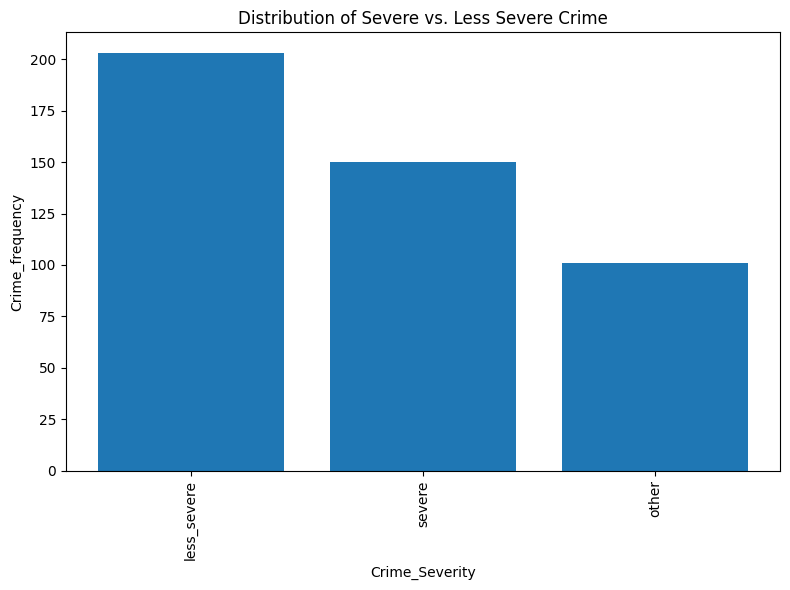

In [291]:
plt.figure(figsize=(8,6))
plt.bar(severe_df['severity'],severe_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Severity')
plt.ylabel('Crime_frequency')
plt.title('Distribution of Severe vs. Less Severe Crime')
plt.tight_layout()
plt.show()

In [292]:
def crime_severity():
    data_11 = crime_grp['severity'].value_counts().sort_values(ascending=False)
    severe_df = pd.DataFrame(data_11).reset_index()
    return severe_df


In [293]:
crime_severity()

Primary Type     severity  count
0                               THEFT  less_severe    203
1                             BATTERY       severe    150
2                     CRIMINAL DAMAGE  less_severe    111
3                 MOTOR VEHICLE THEFT        other    101
4                             ASSAULT       severe     94
5                  DECEPTIVE PRACTICE  less_severe     63
6                       OTHER OFFENSE        other     53
7                             ROBBERY       severe     40
8                            BURGLARY        other     38
9                   WEAPONS VIOLATION        other     25
10                        SEX OFFENSE        other     21
11                  CRIMINAL TRESPASS        other     19
12         OFFENSE INVOLVING CHILDREN        other     15
13                          NARCOTICS        other     13
14            CRIMINAL SEXUAL ASSAULT        other      9
15                           HOMICIDE       severe      5
16                           STALKING        other      4
17                              ARSON        other      4
18             PUBLIC PEACE VIOLATION  less_severe      3
19                       PROSTITUTION        other      3
20   INTERFERENCE WITH PUBLIC OFFICER        other      1
21  CONCEALED CARRY LICENSE VIOLATION        other      1
22                         KIDNAPPING        other      1

In [294]:
def crime_severity_plot():
    fig = plt.figure(figsize=(8,6))
    plt.bar(crime_severity()['severity'],crime_severity()['count'])
    plt.xticks(rotation=90)
    plt.xlabel('Crime_Severity')
    plt.ylabel('Crime_frequency')
    plt.title('Distribution of Severe vs. Less Severe Crime')
    plt.tight_layout()
    plt.show()

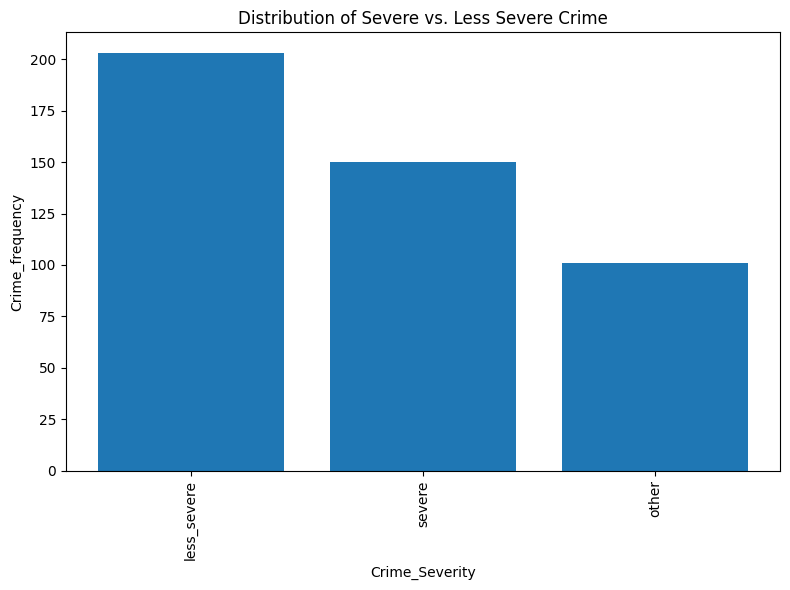

In [295]:
crime_severity_plot()

## Seasonal and Weather Impact ##

In [296]:
df['month_name']

1            May
2           June
3       November
4       November
6      September
         ...    
994    September
995    September
996    September
997    September
998    September
Name: month_name, Length: 977, dtype: object

In [297]:
summer_months = ['June','July','August']
spring = ['March','April','May']
autumn = ['September','October','November']
winter = ['December','January','February']

In [298]:
df['summer'] = df['month_name'].apply(lambda x:  'summer' if x in summer_months else 'not summer' )

In [299]:
df['summer'].value_counts()

summer
not summer    865
summer        112
Name: count, dtype: int64

In [300]:
df['autumn'] = df['month_name'].apply(lambda x: 'autumn' if x in autumn else 'not autumn')

In [301]:
df['spring'] = df['month_name'].apply(lambda x: 'spring' if x in spring else 'not spring')
df['winter'] = df['month_name'].apply(lambda x: 'winter' if x in winter else 'not winter')

In [302]:
df['autumn'].value_counts()

autumn
autumn        840
not autumn    137
Name: count, dtype: int64

In [303]:
df['spring'].value_counts()

spring
not spring    958
spring         19
Name: count, dtype: int64

In [304]:
df['winter'].value_counts()

winter
not winter    971
winter          6
Name: count, dtype: int64

In [305]:
df[['summer','autumn','winter','spring']].value_counts()

summer      autumn      winter      spring    
not summer  autumn      not winter  not spring    840
summer      not autumn  not winter  not spring    112
not summer  not autumn  not winter  spring         19
                        winter      not spring      6
Name: count, dtype: int64

In [306]:
columns = pd.Series(df[['summer','autumn','winter','spring']].value_counts().index.names)
columns

0    summer
1    autumn
2    winter
3    spring
dtype: object

In [307]:
values = pd.Series(df[['summer','autumn','winter','spring']].value_counts().values)
values

0    840
1    112
2     19
3      6
dtype: int64

In [308]:
data_13 = {'seasons' :columns,'crimes':values}
seasons_crime = pd.DataFrame(data_13)

In [309]:
seasons_crime

seasons  crimes
0  summer     840
1  autumn     112
2  winter      19
3  spring       6

In [310]:
def seasons_crime():
    columns = pd.Series(df[['summer','autumn','winter','spring']].value_counts().index.names)
    values = pd.Series(df[['summer','autumn','winter','spring']].value_counts().values)
    data_13 = {'seasons':columns,'crime_numbers':values}
    season_df = pd.DataFrame(data_13)
    return season_df

In [311]:
seasons_crime()

seasons  crime_numbers
0  summer            840
1  autumn            112
2  winter             19
3  spring              6

In [312]:
def seasons_plot():
    fig = plt.figure(figsize=(8,6))
    plt.bar(df[['summer','autumn','winter','spring']].value_counts().index.names,df[['summer','autumn','winter','spring']].value_counts().values)
    plt.xticks(rotation=90)
    plt.xlabel('Seasons')
    plt.ylabel('Crime_frequency')
    plt.title('Seasonal Trends vs. Crime Frequency')
    plt.tight_layout()
    plt.show()

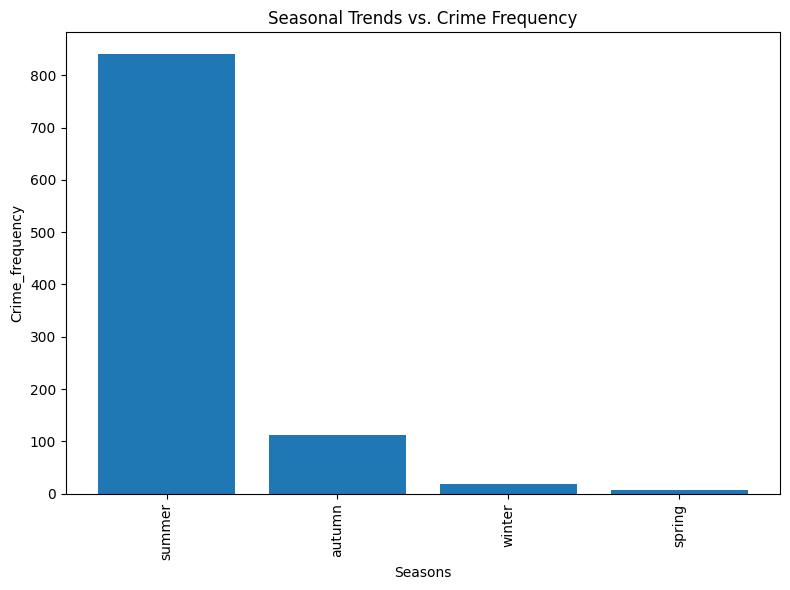

In [313]:
seasons_plot()

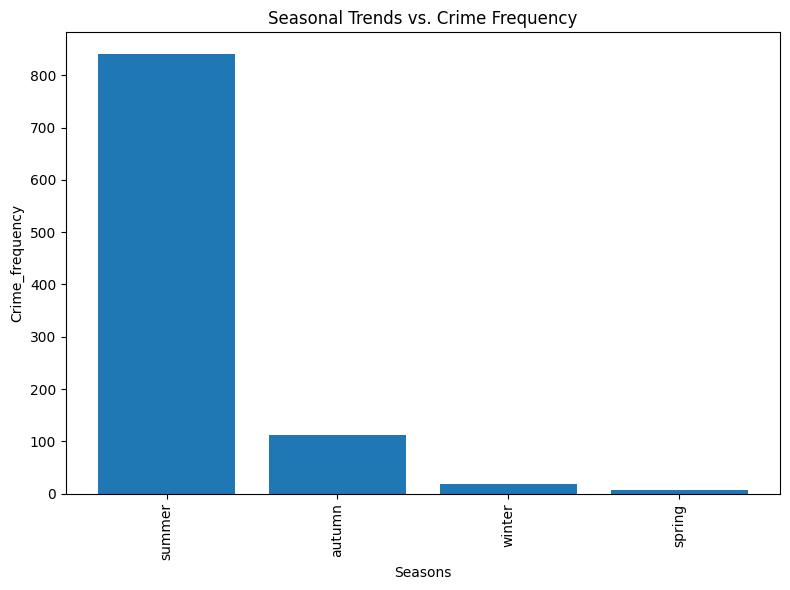

In [314]:
plt.figure(figsize=(8,6))
plt.bar(df[['summer','autumn','winter','spring']].value_counts().index.names,df[['summer','autumn','winter','spring']].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('Seasons')
plt.ylabel('Crime_frequency')
plt.title('Seasonal Trends vs. Crime Frequency')
plt.tight_layout()
plt.show()

In [315]:
df_1 = df.copy()
df_1.head(2)

ID Case Number                Date                  Block IUCR  \
1  25953    JE240540 2021-05-24 15:06:00    020XX N LARAMIE AVE  110   
2  26038    JE279849 2021-06-26 09:24:00  062XX N MC CORMICK RD  110   

  Primary Type          Description Location Description  Arrest  Domestic  \
1     HOMICIDE  FIRST DEGREE MURDER               STREET    True     False   
2     HOMICIDE  FIRST DEGREE MURDER          PARKING LOT    True     False   

   ...                       Location  month_name       day  hour  year  \
1  ...  (41.917838056, -87.755968972)         May    Monday    15  2021   
2  ...  (41.995219444, -87.713354912)        June  Saturday     9  2021   

   severity      summer      autumn      spring      winter  
1    severe  not summer  not autumn      spring  not winter  
2    severe      summer  not autumn  not spring  not winter  

[2 rows x 31 columns]

In [316]:
df_1.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'month_name', 'day', 'hour', 'year', 'severity', 'summer',
       'autumn', 'spring', 'winter'],
      dtype='object')

In [317]:
colms = [col for col in df_1.columns.drop(['Primary Type','Description','Domestic','Location','District'])]
print(colms,end=" ")

['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Location Description', 'Arrest', 'Beat', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'month_name', 'day', 'hour', 'year', 'severity', 'summer', 'autumn', 'spring', 'winter'] 

In [318]:
df_1 = df_1.drop(columns=colms,axis=1)
df_1

Primary Type                                        Description  \
1               HOMICIDE                                FIRST DEGREE MURDER   
2               HOMICIDE                                FIRST DEGREE MURDER   
3               BURGLARY                                     UNLAWFUL ENTRY   
4                BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
6        CRIMINAL DAMAGE                                         TO VEHICLE   
..                   ...                                                ...   
994                THEFT                                     $500 AND UNDER   
995  MOTOR VEHICLE THEFT                                         AUTOMOBILE   
996   DECEPTIVE PRACTICE                           FRAUD OR CONFIDENCE GAME   
997              BATTERY                            DOMESTIC BATTERY SIMPLE   
998      CRIMINAL DAMAGE                                        TO PROPERTY   

     Domestic  District                       Location  
1       False        25  (41.917838056, -87.755968972)  
2       False        17  (41.995219444, -87.713354912)  
3       False        19  (41.952345086, -87.677975059)  
4       False         6  (41.737750767, -87.604855911)  
6       False         1  (41.886018055, -87.633937881)  
..        ...       ...                            ...  
994     False         1  (41.865336883, -87.625785555)  
995     False         3  (41.765037977, -87.607989236)  
996     False         7  (41.763396621, -87.643595327)  
997      True         4  (41.744109895, -87.546671547)  
998     False         3    (41.7727202, -87.586295567)  

[977 rows x 5 columns]

In [319]:
prime_type_list = df_1['Primary Type'].unique().tolist()
print(prime_type_list,end=" ")

['HOMICIDE', 'BURGLARY', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'CRIMINAL SEXUAL ASSAULT', 'THEFT', 'OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'ASSAULT', 'SEX OFFENSE', 'OTHER OFFENSE', 'WEAPONS VIOLATION', 'STALKING', 'CRIMINAL TRESPASS', 'PROSTITUTION', 'ARSON', 'NARCOTICS', 'KIDNAPPING', 'CONCEALED CARRY LICENSE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION'] 

In [320]:
prime_type_dic = {}
for i,key in enumerate(prime_type_list):
    prime_type_dic[key] = i

In [321]:
print(prime_type_dic,end=" ")

{'HOMICIDE': 0, 'BURGLARY': 1, 'BATTERY': 2, 'CRIMINAL DAMAGE': 3, 'DECEPTIVE PRACTICE': 4, 'CRIMINAL SEXUAL ASSAULT': 5, 'THEFT': 6, 'OFFENSE INVOLVING CHILDREN': 7, 'MOTOR VEHICLE THEFT': 8, 'ROBBERY': 9, 'ASSAULT': 10, 'SEX OFFENSE': 11, 'OTHER OFFENSE': 12, 'WEAPONS VIOLATION': 13, 'STALKING': 14, 'CRIMINAL TRESPASS': 15, 'PROSTITUTION': 16, 'ARSON': 17, 'NARCOTICS': 18, 'KIDNAPPING': 19, 'CONCEALED CARRY LICENSE VIOLATION': 20, 'INTERFERENCE WITH PUBLIC OFFICER': 21, 'PUBLIC PEACE VIOLATION': 22} 

In [322]:
district_list = df_1['District'].unique().tolist()
district_list

[25, 17, 19, 6, 1, 12, 3, 8, 7, 22, 9, 11, 4, 16, 14, 5, 2, 10, 20, 18, 15, 24]

In [323]:
district_list_encoded = {key : i for i,key in enumerate(district_list)}
print(district_list_encoded,end=" ")

{25: 0, 17: 1, 19: 2, 6: 3, 1: 4, 12: 5, 3: 6, 8: 7, 7: 8, 22: 9, 9: 10, 11: 11, 4: 12, 16: 13, 14: 14, 5: 15, 2: 16, 10: 17, 20: 18, 18: 19, 15: 20, 24: 21} 

In [324]:
desc_list = df_1["Description"].unique().tolist()
print(desc_list,end=" ")

['FIRST DEGREE MURDER', 'UNLAWFUL ENTRY', 'AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY', 'TO VEHICLE', 'FINANCIAL IDENTITY THEFT OVER $ 300', 'NON-AGGRAVATED', '$500 AND UNDER', 'TO PROPERTY', 'OVER $500', 'FORGERY', 'FROM BUILDING', 'BOGUS CHECK', 'CHILD ABDUCTION', 'AUTOMOBILE', 'ATTEMPT - FINANCIAL IDENTITY THEFT', 'ARMED - HANDGUN', 'SIMPLE', 'PREDATORY', 'VEHICULAR HIJACKING', 'INDECENT SOLICITATION OF A CHILD', 'HARASSMENT BY ELECTRONIC MEANS', 'AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER', 'SEXUAL EXPLOITATION OF A CHILD', 'AGGRAVATED CRIMINAL SEXUAL ABUSE', 'RECKLESS FIREARM DISCHARGE', 'CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER', 'AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER', 'CYBERSTALKING', 'AGGRAVATED - OTHER', 'RETAIL THEFT', 'TO STATE SUP LAND', 'THEFT OF LOST / MISLAID PROPERTY', 'TO LAND', 'DOMESTIC BATTERY SIMPLE', 'ATTEMPT - AUTOMOBILE', 'AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON', 'OTHER VEHICLE OFFENSE', 'FALSE / STOLEN / ALTERED TR

In [325]:
desc_dic = {key : i for i,key in enumerate(desc_list)}
print(desc_dic,end=" ")

{'FIRST DEGREE MURDER': 0, 'UNLAWFUL ENTRY': 1, 'AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY': 2, 'TO VEHICLE': 3, 'FINANCIAL IDENTITY THEFT OVER $ 300': 4, 'NON-AGGRAVATED': 5, '$500 AND UNDER': 6, 'TO PROPERTY': 7, 'OVER $500': 8, 'FORGERY': 9, 'FROM BUILDING': 10, 'BOGUS CHECK': 11, 'CHILD ABDUCTION': 12, 'AUTOMOBILE': 13, 'ATTEMPT - FINANCIAL IDENTITY THEFT': 14, 'ARMED - HANDGUN': 15, 'SIMPLE': 16, 'PREDATORY': 17, 'VEHICULAR HIJACKING': 18, 'INDECENT SOLICITATION OF A CHILD': 19, 'HARASSMENT BY ELECTRONIC MEANS': 20, 'AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER': 21, 'SEXUAL EXPLOITATION OF A CHILD': 22, 'AGGRAVATED CRIMINAL SEXUAL ABUSE': 23, 'RECKLESS FIREARM DISCHARGE': 24, 'CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER': 25, 'AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER': 26, 'CYBERSTALKING': 27, 'AGGRAVATED - OTHER': 28, 'RETAIL THEFT': 29, 'TO STATE SUP LAND': 30, 'THEFT OF LOST / MISLAID PROPERTY': 31, 'TO LAND': 32, 'DOMESTIC BATTERY SIMPLE': 33, 'ATTEMP

In [326]:
domestic_list = df_1['Domestic'].unique().tolist()
print(domestic_list,end=" ")

[False, True] 

In [327]:
domestic_dic = {key : i for i,key in enumerate(domestic_list)}
print(domestic_dic,end=" ")

{False: 0, True: 1} 

In [328]:
domestic_dic_1 = {i : key for i,key in enumerate(domestic_list)}
domestic_dic_1

{0: False, 1: True}

In [329]:
location_list = df_1['Location'].unique().tolist()
print(location_list,end=" ")

['(41.917838056, -87.755968972)', '(41.995219444, -87.713354912)', '(41.952345086, -87.677975059)', '(41.737750767, -87.604855911)', '(41.886018055, -87.633937881)', '(41.877565108, -87.68479102)', '(41.7619185, -87.576209245)', '(41.943378528, -87.7199738)', '(41.796477414, -87.708540915)', '(41.752688801, -87.704908791)', '(41.758126171, -87.631582508)', '(41.731497731, -87.658074565)', '(41.764827083, -87.671709119)', '(41.837651929, -87.641404086)', '(41.880594385, -87.702959421)', '(41.880779076, -87.721377025)', '(41.915187259, -87.775425225)', '(41.952036311, -87.646281883)', '(41.898884591, -87.734196199)', '(41.699971107, -87.532866422)', '(41.89850206, -87.69924242)', '(41.705956552, -87.648373487)', '(41.749500329, -87.6011574)', '(41.745882542, -87.597167639)', '(41.746626309, -87.618031954)', '(41.736409029, -87.562410309)', '(41.771782439, -87.649436929)', '(41.899206068, -87.705505587)', '(41.763337967, -87.597001131)', '(41.985875279, -87.766403857)', '(41.76261474, -87

In [330]:
location_dic = {key:i for i,key in enumerate(location_list)}
print(location_dic,end=" ")

{'(41.917838056, -87.755968972)': 0, '(41.995219444, -87.713354912)': 1, '(41.952345086, -87.677975059)': 2, '(41.737750767, -87.604855911)': 3, '(41.886018055, -87.633937881)': 4, '(41.877565108, -87.68479102)': 5, '(41.7619185, -87.576209245)': 6, '(41.943378528, -87.7199738)': 7, '(41.796477414, -87.708540915)': 8, '(41.752688801, -87.704908791)': 9, '(41.758126171, -87.631582508)': 10, '(41.731497731, -87.658074565)': 11, '(41.764827083, -87.671709119)': 12, '(41.837651929, -87.641404086)': 13, '(41.880594385, -87.702959421)': 14, '(41.880779076, -87.721377025)': 15, '(41.915187259, -87.775425225)': 16, '(41.952036311, -87.646281883)': 17, '(41.898884591, -87.734196199)': 18, '(41.699971107, -87.532866422)': 19, '(41.89850206, -87.69924242)': 20, '(41.705956552, -87.648373487)': 21, '(41.749500329, -87.6011574)': 22, '(41.745882542, -87.597167639)': 23, '(41.746626309, -87.618031954)': 24, '(41.736409029, -87.562410309)': 25, '(41.771782439, -87.649436929)': 26, '(41.899206068, -87

In [331]:
df_1['Primary Type'] = df_1['Primary Type'].map(prime_type_dic)
df_1['Primary Type']

1      0
2      0
3      1
4      2
6      3
      ..
994    6
995    8
996    4
997    2
998    3
Name: Primary Type, Length: 977, dtype: int64

In [332]:
df_1['Description'] = df_1['Description'].map(desc_dic)
df_1['Description']

1       0
2       0
3       1
4       2
6       3
       ..
994     6
995    13
996    59
997    33
998     7
Name: Description, Length: 977, dtype: int64

In [333]:
df_1['Domestic'] = df_1['Domestic'].map(domestic_dic)
df_1['Domestic']

1      0
2      0
3      0
4      0
6      0
      ..
994    0
995    0
996    0
997    1
998    0
Name: Domestic, Length: 977, dtype: int64

In [334]:
df_1['Location'] = df_1['Location'].map(location_dic)
df_1['Location']

1        0
2        1
3        2
4        3
6        4
      ... 
994    927
995    928
996    929
997    930
998    931
Name: Location, Length: 977, dtype: int64

In [335]:
df_1['District'] = df_1['District'].map(district_list_encoded)
df_1['District']

1       0
2       1
3       2
4       3
6       4
       ..
994     4
995     6
996     8
997    12
998     6
Name: District, Length: 977, dtype: int64

In [336]:
df_1

Primary Type  Description  Domestic  District  Location
1               0            0         0         0         0
2               0            0         0         1         1
3               1            1         0         2         2
4               2            2         0         3         3
6               3            3         0         4         4
..            ...          ...       ...       ...       ...
994             6            6         0         4       927
995             8           13         0         6       928
996             4           59         0         8       929
997             2           33         1        12       930
998             3            7         0         6       931

[977 rows x 5 columns]

## Imbalanced Data ##

In [337]:
df_1['Primary Type'].value_counts()

Primary Type
6     203
2     150
3     111
8     101
10     94
4      63
12     53
9      40
1      38
13     25
11     21
15     19
7      15
18     13
5       9
0       5
17      4
14      4
16      3
22      3
19      1
20      1
21      1
Name: count, dtype: int64

In [338]:
df_1['Primary Type'].value_counts(normalize=True)

Primary Type
6    0.21
2    0.15
3    0.11
8    0.10
10   0.10
4    0.06
12   0.05
9    0.04
1    0.04
13   0.03
11   0.02
15   0.02
7    0.02
18   0.01
5    0.01
0    0.01
17   0.00
14   0.00
16   0.00
22   0.00
19   0.00
20   0.00
21   0.00
Name: proportion, dtype: float64

In [339]:
X= df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = LogisticRegression()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train Accuracy Score : {accuracy_score(y_train,train_pred)}")
print(f"Train Precision_score : {precision_score(y_train,train_pred,average='weighted')}")
print(f"Train Recall_score : {recall_score(y_train,train_pred,average='weighted')}")
print(f"Train F1_score : {f1_score(y_train,train_pred,average='weighted')}")
print()
print(f"Test Accuracy Score : {accuracy_score(y_test,test_pred)}")
print(f"Test Precision_score : {precision_score(y_test,test_pred,average='weighted')}")
print(f"Test Recall_score : {recall_score(y_test,test_pred,average='weighted')}")
print(f"Test F1_score : {f1_score(y_test,test_pred,average='weighted')}")

Train Accuracy Score : 0.26888604353393086
Train Precision_score : 0.16728262516900208
Train Recall_score : 0.26888604353393086
Train F1_score : 0.191915415276615

Test Accuracy Score : 0.25
Test Precision_score : 0.17253291340369992
Test Recall_score : 0.25
Test F1_score : 0.1800872571966931


In [340]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = LazyClassifier()

models,predictions = models.fit(x_train,x_test,y_train,y_test)

models

 97%|█████████▋| 28/29 [00:02<00:00, 16.97it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 781, number of used features: 4
[LightGBM] [Info] Start training from score -5.561963
[LightGBM] [Info] Start training from score -3.134215
[LightGBM] [Info] Start training from score -1.942076
[LightGBM] [Info] Start training from score -2.127976
[LightGBM] [Info] Start training from score -2.709331
[LightGBM] [Info] Start training from score -4.581134
[LightGBM] [Info] Start training from score -1.560709
[LightGBM] [Info] Start training from score -4.021518
[LightGBM] [Info] Start training from score -2.291127
[LightGBM] [Info] Start training from score -3.164068
[LightGBM] [Info] Start training from score -2.370116
[LightGBM] [Info] Start training from score -3.887986
[Li

100%|██████████| 29/29 [00:03<00:00,  8.05it/s]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
DecisionTreeClassifier           0.79               0.73    None      0.79   
BaggingClassifier                0.83               0.72    None      0.82   
LGBMClassifier                   0.81               0.68    None      0.80   
RandomForestClassifier           0.71               0.55    None      0.71   
ExtraTreesClassifier             0.70               0.51    None      0.69   
ExtraTreeClassifier              0.42               0.36    None      0.42   
LabelSpreading                   0.45               0.32    None      0.44   
LabelPropagation                 0.44               0.32    None      0.44   
KNeighborsClassifier             0.38               0.24    None      0.36   
GaussianNB                       0.15               0.22    None      0.12   
NearestCentroid                  0.16               0.19    None      0.17   
Perceptron                       0.20               0.15    None      0.14   
LinearDiscriminantAnalysis       0.33               0.14    None      0.22   
AdaBoostClassifier               0.09               0.13    None      0.06   
SVC                              0.31               0.11    None      0.22   
LogisticRegression               0.31               0.11    None      0.22   
CalibratedClassifierCV           0.32               0.10    None      0.22   
LinearSVC                        0.32               0.10    None      0.20   
RidgeClassifier                  0.31               0.10    None      0.20   
BernoulliNB                      0.30               0.09    None      0.19   
SGDClassifier                    0.22               0.09    None      0.18   
RidgeClassifierCV                0.31               0.09    None      0.19   
PassiveAggressiveClassifier      0.14               0.09    None      0.11   
DummyClassifier                  0.20               0.05    None      0.07   

                             Time Taken  
Model                                    
DecisionTreeClassifier             0.03  
BaggingClassifier                  0.08  
LGBMClassifier                     1.48  
RandomForestClassifier             0.34  
ExtraTreesClassifier               0.27  
ExtraTreeClassifier                0.02  
LabelSpreading                     0.06  
LabelPropagation                   0.04  
KNeighborsClassifier               0.04  
GaussianNB                         0.02  
NearestCentroid                    0.02  
Perceptron                         0.04  
LinearDiscriminantAnalysis         0.03  
AdaBoostClassifier                 0.26  
SVC                                0.10  
LogisticRegression                 0.04  
CalibratedClassifierCV             0.31  
LinearSVC                          0.17  
RidgeClassifier                    0.03  
BernoulliNB                        0.03  
SGDClassifier                      0.06  
RidgeClassifierCV                  0.02  
PassiveAggressiveClassifier        0.04  
DummyClassifier                    0.02

In [341]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = DecisionTreeClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train Accuracy Score : {accuracy_score(y_train,train_pred)}")
print(f"Train Precision_score : {precision_score(y_train,train_pred,average="weighted")}")
print(f"Train Recall_score : {recall_score(y_train,train_pred,average="weighted")}")
print(f"Train F1_score : {f1_score(y_train,train_pred,average="weighted")}")
print()
print(f"Test Accuracy Score :{accuracy_score(y_test,test_pred)}")
print(f"Test Precision_score : {precision_score(y_test,test_pred,average="weighted")}")
print(f"Test Recall_score : {recall_score(y_test,test_pred,average="weighted")}")
print(f"Test F1_score : {f1_score(y_test,test_pred,average="weighted")}")

Train Accuracy Score : 1.0
Train Precision_score : 1.0
Train Recall_score : 1.0
Train F1_score : 1.0

Test Accuracy Score :0.8112244897959183
Test Precision_score : 0.8149701556052253
Test Recall_score : 0.8112244897959183
Test F1_score : 0.8069538926681785


In [342]:
X = df_1.drop(['Primary Type'],axis = 1)
y = df_1['Primary Type']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier()

model.fit(x_train,y_train)
    
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f"Train Accuracy Score : {accuracy_score(y_train,train_pred)}")
print(f"Train Precision_score : {precision_score(y_train,train_pred,average="weighted")}")
print(f"Train Recall_score : {recall_score(y_train,train_pred,average="weighted")}")
print(f"Train F1_score : {f1_score(y_train,train_pred,average="weighted")}")
print()
print(f"Test Accuracy Score : {accuracy_score(y_test,test_pred)}")
print(f"Test Precision_score : {precision_score(y_test,test_pred,average="weighted")}")
print(f"Test Recall_score : {recall_score(y_test,test_pred,average="weighted")}")
print(f"Test F1_score : {f1_score(y_test,test_pred,average="weighted")}")

Train Accuracy Score : 0.10115236875800256
Train Precision_score : 0.09888436419604021
Train Recall_score : 0.10115236875800256
Train F1_score : 0.0999144161864393

Test Accuracy Score : 0.15816326530612246
Test Precision_score : 0.15561408065710075
Test Recall_score : 0.15816326530612246
Test F1_score : 0.15003397724725184


In [343]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

model = BaggingClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train Accuracy Score : {accuracy_score(y_train,train_pred)}")
print(f"Train Precision_score : {precision_score(y_train,train_pred,average="weighted")}")
print(f"Train Recall_score : {recall_score(y_train,train_pred,average="weighted")}")
print(f"Train F1_score : {f1_score(y_train,train_pred,average="weighted")}")
print()
print(f"Test Accuracy Score : {accuracy_score(y_test,test_pred)}")
print(f"Test Precision_score : {precision_score(y_test,test_pred,average="weighted")}")
print(f"Test Recall_score : {recall_score(y_test,test_pred,average="weighted")}")
print(f"Test F1_score : {f1_score(y_test,test_pred,average="weighted")}")

Train Accuracy Score : 0.9989290495314592
Train Precision_score : 0.9989542483660131
Train Recall_score : 0.9989290495314592
Train F1_score : 0.9989286460691067

Test Accuracy Score : 0.9882226980728052
Test Precision_score : 0.9886553590976167
Test Recall_score : 0.9882226980728052
Test F1_score : 0.9881854856104213


## Balanced data ##

In [344]:
y_train.value_counts()

Primary Type
3     177
9     171
14    169
0     168
6     167
2     166
22    165
5     163
17    163
19    162
21    162
16    162
18    161
10    160
12    160
8     160
1     159
15    159
20    159
7     159
13    156
4     156
11    151
Name: count, dtype: int64

In [345]:
y_train.value_counts(normalize=True)

Primary Type
3    0.05
9    0.05
14   0.05
0    0.04
6    0.04
2    0.04
22   0.04
5    0.04
17   0.04
19   0.04
21   0.04
16   0.04
18   0.04
10   0.04
12   0.04
8    0.04
1    0.04
15   0.04
20   0.04
7    0.04
13   0.04
4    0.04
11   0.04
Name: proportion, dtype: float64

In [346]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),BaggingClassifier(),
         AdaBoostClassifier(),GradientBoostingClassifier()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()

********LogisticRegression*********
Train Accuracy : 0.36599732262382867
Train Precision : 0.24976675903481996
Train Recall : 0.36599732262382867
Train F1 Score : 0.2862593165431203

Test Accuracy : 0.3404710920770878
Test Precision : 0.23776561016826844
Test Recall : 0.3404710920770878
Test F1_Score: 0.2618277543980937

********KNeighborsClassifier*********
Train Accuracy : 0.8953145917001338
Train Precision : 0.8889684034509262
Train Recall : 0.8953145917001338
Train F1 Score : 0.8884203898126972

Test Accuracy : 0.8222698072805139
Test Precision : 0.8081265666508077
Test Recall : 0.8222698072805139
Test F1_Score: 0.8076996173219474

********SVC*********
Train Accuracy : 0.34966532797858096
Train Precision : 0.21248278520059302
Train Recall : 0.34966532797858096
Train F1 Score : 0.25196929764442094

Test Accuracy : 0.32441113490364026
Test Precision : 0.202714930050477
Test Recall : 0.32441113490364026
Test F1_Score: 0.23190709366361978

********DecisionTreeClassifier*********
Train 

In [347]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = GradientBoostingClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f" Train Accuracy Score : {accuracy_score(y_train,train_pred)}")
print(f"Train Precision_score : {precision_score(y_train,train_pred,average="weighted")}")
print(f"Train Recall_score : {recall_score(y_train,train_pred,average="weighted")}")
print(f"Train F1_score : {f1_score(y_train,train_pred,average="weighted")}")
print()
print(f"Test Accuracy Score : {accuracy_score(y_test,test_pred)}")
print(f"Test Precision_score : {precision_score(y_test,test_pred,average="weighted")}")
print(f"Test Recall_score : {recall_score(y_test,test_pred,average="weighted")}")
print(f"Test F1_score : {f1_score(y_test,test_pred,average="weighted")}")

 Train Accuracy Score : 0.998719590268886
Train Precision_score : 0.9987368931030903
Train Recall_score : 0.998719590268886
Train F1_score : 0.9987211977436588

Test Accuracy Score : 0.8469387755102041
Test Precision_score : 0.8628918958887903
Test Recall_score : 0.8469387755102041
Test F1_score : 0.8443715399318694


In [348]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = GradientBoostingClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f" Train Accuracy Score : {accuracy_score(y_train,train_pred)}")
print(f"Train Precision_score : {precision_score(y_train,train_pred,average="weighted")}")
print(f"Train Recall_score : {recall_score(y_train,train_pred,average="weighted")}")
print(f"Train F1_score : {f1_score(y_train,train_pred,average="weighted")}")
print()
print(f"Test Accuracy Score : {accuracy_score(y_test,test_pred)}")
print(f"Test Precision_score : {precision_score(y_test,test_pred,average="weighted")}")
print(f"Test Recall_score : {recall_score(y_test,test_pred,average="weighted")}")
print(f"Test F1_score : {f1_score(y_test,test_pred,average="weighted")}")


 Train Accuracy Score : 0.9975903614457832
Train Precision_score : 0.9976651713087109
Train Recall_score : 0.9975903614457832
Train F1_score : 0.9975900678866078

Test Accuracy Score : 0.9807280513918629
Test Precision_score : 0.9812156593406594
Test Recall_score : 0.9807280513918629
Test F1_score : 0.9804555735761998


In [349]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f" Train Accuracy Score : {accuracy_score(y_train,train_pred)}")
print(f"Train Precision_score : {precision_score(y_train,train_pred,average="weighted")}")
print(f"Train Recall_score : {recall_score(y_train,train_pred,average="weighted")}")
print(f"Train F1_score : {f1_score(y_train,train_pred,average="weighted")}")
print()
print(f"Test Accuracy Score : {accuracy_score(y_test,test_pred)}")
print(f"Test Precision_score : {precision_score(y_test,test_pred,average="weighted")}")
print(f"Test Recall_score : {recall_score(y_test,test_pred,average="weighted")}")
print(f"Test F1_score : {f1_score(y_test,test_pred,average="weighted")}")


 Train Accuracy Score : 0.9983935742971888
Train Precision_score : 0.9984094057252506
Train Recall_score : 0.9983935742971888
Train F1_score : 0.9983934140247477

Test Accuracy Score : 0.9850107066381156
Test Precision_score : 0.9856305483714477
Test Recall_score : 0.9850107066381156
Test F1_score : 0.9850238279277668


In [350]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,min_samples_split=0.28,min_samples_leaf=0.1,max_depth =5,max_features='sqrt',
                                       criterion='squared_error',subsample=1.0,n_estimators=100)

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f" Train Accuracy Score : {accuracy_score(y_train,train_pred)}")
print(f"Train Precision_score : {precision_score(y_train,train_pred,average="weighted")}")
print(f"Train Recall_score : {recall_score(y_train,train_pred,average="weighted")}")
print(f"Train F1_score : {f1_score(y_train,train_pred,average="weighted")}")
print()
print(f"Test Accuracy Score : {accuracy_score(y_test,test_pred)}")
print(f"Test Precision_score : {precision_score(y_test,test_pred,average="weighted")}")
print(f"Test Recall_score : {recall_score(y_test,test_pred,average="weighted")}")
print(f"Test F1_score : {f1_score(y_test,test_pred,average="weighted")}")


 Train Accuracy Score : 0.9534136546184739
Train Precision_score : 0.9570701479754559
Train Recall_score : 0.9534136546184739
Train F1_score : 0.9521229094096069

Test Accuracy Score : 0.9539614561027837
Test Precision_score : 0.9573296958706046
Test Recall_score : 0.9539614561027837
Test F1_score : 0.9527155908384507


In [351]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier()

params = {'n_estimators' : [20,50,100,300, 400, 500, 600, 700, 800, 900, 1000]}

cv = GridSearchCV(model,params)
cv.fit(x_train,y_train)
cv.best_params_

{'n_estimators': 500}

In [352]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier()

params = {'max_samples':[x / 10 for x in range(1, 11)]}

cv = GridSearchCV(model,params)
cv.fit(x_train,y_train)
cv.best_params_



{'max_samples': 1.0}

In [353]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier()

params = {'max_features':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.90, 0.92, 0.95, 1.0,2.0]}

cv = GridSearchCV(model,params)
cv.fit(x_train,y_train)
cv.best_params_

{'max_features': 0.92}

In [354]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier()

params = {'bootstrap':[True, False]}

cv = GridSearchCV(model,params)
cv.fit(x_train,y_train)
cv.best_params_

{'bootstrap': False}

In [355]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier()

params = {'bootstrap_features':[True, False]}

cv = GridSearchCV(model,params)
cv.fit(x_train,y_train)
cv.best_params_

{'bootstrap_features': True}

In [356]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier()

params = {'oob_score':[True, False]}

cv = GridSearchCV(model,params)
cv.fit(x_train,y_train)
cv.best_params_

{'oob_score': True}

In [357]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier()

params = {'warm_start':[True, False]}

cv = GridSearchCV(model,params)
cv.fit(x_train,y_train)
cv.best_params_

{'warm_start': True}

In [358]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = BaggingClassifier(n_estimators =50,max_samples=1.0,max_features=1.0,bootstrap=False,bootstrap_features=False,
                          oob_score=False,warm_start=True)

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f" Train Accuracy Score : {accuracy_score(y_train,train_pred)}")
print(f"Train Precision_score : {precision_score(y_train,train_pred,average="weighted")}")
print(f"Train Recall_score : {recall_score(y_train,train_pred,average="weighted")}")
print(f"Train F1_score : {f1_score(y_train,train_pred,average="weighted")}")
print()
print(f"Test Accuracy Score : {accuracy_score(y_test,test_pred)}")
print(f"Test Precision_score : {precision_score(y_test,test_pred,average="weighted")}")
print(f"Test Recall_score : {recall_score(y_test,test_pred,average="weighted")}")
print(f"Test F1_score : {f1_score(y_test,test_pred,average="weighted")}")


 Train Accuracy Score : 1.0
Train Precision_score : 1.0
Train Recall_score : 1.0
Train F1_score : 1.0

Test Accuracy Score : 0.9925053533190579
Test Precision_score : 0.9928893483528463
Test Recall_score : 0.9925053533190579
Test F1_score : 0.9925481716546427


## Saving the Model ##

In [359]:
with open("model.pkl","wb") as file:
    pickle.dump(model,file)

## Loading the Model ##

In [360]:
with open("model.pkl","rb") as file:
    class_model = pickle.load(file)

In [361]:
df_1.tail(5)

Primary Type  Description  Domestic  District  Location
994             6            6         0         4       927
995             8           13         0         6       928
996             4           59         0         8       929
997             2           33         1        12       930
998             3            7         0         6       931

In [362]:
df.tail(5)

ID Case Number                Date                     Block  IUCR  \
994  13203421    JG415540 2023-09-07 20:24:00        013XX S WABASH AVE   820   
995  13202672    JG414584 2023-09-07 00:01:00       071XX S LANGLEY AVE   910   
996  13204410    JG416803 2023-09-07 13:34:00           007XX W 72ND ST  1130   
997  13204809    JG415669 2023-09-07 20:30:00       083XX S BRANDON AVE   486   
998  13208800    JG411427 2023-09-05 02:44:00  067XX S STONY ISLAND AVE  1310   

            Primary Type               Description Location Description  \
994                THEFT            $500 AND UNDER                ALLEY   
995  MOTOR VEHICLE THEFT                AUTOMOBILE               STREET   
996   DECEPTIVE PRACTICE  FRAUD OR CONFIDENCE GAME            RESIDENCE   
997              BATTERY   DOMESTIC BATTERY SIMPLE            APARTMENT   
998      CRIMINAL DAMAGE               TO PROPERTY           RESTAURANT   

     Arrest  Domestic  ...                       Location  month_name  \
994   False     False  ...  (41.865336883, -87.625785555)   September   
995   False     False  ...  (41.765037977, -87.607989236)   September   
996   False     False  ...  (41.763396621, -87.643595327)   September   
997   False      True  ...  (41.744109895, -87.546671547)   September   
998   False     False  ...    (41.7727202, -87.586295567)   September   

          day  hour  year     severity      summer  autumn      spring  \
994  Thursday    20  2023  less_severe  not summer  autumn  not spring   
995  Thursday     0  2023        other  not summer  autumn  not spring   
996  Thursday    13  2023  less_severe  not summer  autumn  not spring   
997  Thursday    20  2023       severe  not summer  autumn  not spring   
998   Tuesday     2  2023  less_severe  not summer  autumn  not spring   

         winter  
994  not winter  
995  not winter  
996  not winter  
997  not winter  
998  not winter  

[5 rows x 31 columns]

In [363]:
arr = np.array([13,0,6,928])
input_data = arr.reshape(1,4)
input_data

array([[ 13,   0,   6, 928]])

In [364]:
prediction = model.predict(input_data)
pred = prediction.tolist()
pred_1 = int(pred[0])
pred_1

8

In [365]:
rev_prim = {i : key for i,key in enumerate(prime_type_list)}
rev_prim

{0: 'HOMICIDE',
 1: 'BURGLARY',
 2: 'BATTERY',
 3: 'CRIMINAL DAMAGE',
 4: 'DECEPTIVE PRACTICE',
 5: 'CRIMINAL SEXUAL ASSAULT',
 6: 'THEFT',
 7: 'OFFENSE INVOLVING CHILDREN',
 8: 'MOTOR VEHICLE THEFT',
 9: 'ROBBERY',
 10: 'ASSAULT',
 11: 'SEX OFFENSE',
 12: 'OTHER OFFENSE',
 13: 'WEAPONS VIOLATION',
 14: 'STALKING',
 15: 'CRIMINAL TRESPASS',
 16: 'PROSTITUTION',
 17: 'ARSON',
 18: 'NARCOTICS',
 19: 'KIDNAPPING',
 20: 'CONCEALED CARRY LICENSE VIOLATION',
 21: 'INTERFERENCE WITH PUBLIC OFFICER',
 22: 'PUBLIC PEACE VIOLATION'}

In [366]:
rev_prim[21]

'INTERFERENCE WITH PUBLIC OFFICER'

In [367]:
arr = np.array([13,0,6,928])
input_data = arr.reshape(1,4)
prediction = model.predict(input_data)
pred = prediction.tolist()
pred_1 = int(pred[0])
pred_new = rev_prim[pred_1]
print(pred_new)

MOTOR VEHICLE THEFT


In [368]:
def get_prediction(description,domestic,district,location):
    arr = np.array([description,domestic,district,location])
    input_data = arr.reshape(1,4)
    prediction = model.predict(input_data)
    pred = prediction.tolist()
    pred_1 = int(pred[0])
    pred_new = rev_prim[pred_1]
    return pred_new
    

In [369]:
get_prediction(59,0,8,929)

'DECEPTIVE PRACTICE'

In [370]:
df_1.tail(5)

Primary Type  Description  Domestic  District  Location
994             6            6         0         4       927
995             8           13         0         6       928
996             4           59         0         8       929
997             2           33         1        12       930
998             3            7         0         6       931

In [371]:
df[['Primary Type','Description','Domestic','District','Location']].sample(5)

Primary Type              Description  Domestic  District  \
6        CRIMINAL DAMAGE               TO VEHICLE     False         1   
628                THEFT             RETAIL THEFT     False        19   
925              BATTERY  DOMESTIC BATTERY SIMPLE      True        19   
205  MOTOR VEHICLE THEFT               AUTOMOBILE     False         6   
584              BATTERY                   SIMPLE     False        19   

                          Location  
6    (41.886018055, -87.633937881)  
628  (41.925078949, -87.673734337)  
925   (41.96750702, -87.669410137)  
205  (41.724768174, -87.628740293)  
584  (41.963478472, -87.664201385)